In [1]:
#Import Libraries
import requests
from bs4 import BeautifulSoup


In [2]:
#Specify with which web page you are going to be scraping
page = requests.get('https://en.wikipedia.org/wiki/List_of_cryptocurrencies')
#Parse the HTML into the BeautifulSoup parse tree format
soup = BeautifulSoup(page.text, 'html.parser')
#To look at the HTML underlying to the web 
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of cryptocurrencies - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"41e273fd-ee4d-4b6c-bf8e-d03dac7537d8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_cryptocurrencies","wgTitle":"List of cryptocurrencies","wgCurRevisionId":1011056953,"wgRevisionId":1011056953,"wgArticleId":39492103,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Articles with short description","Short description is different from Wikidata","W

In [3]:
#To get the title of the page
title = soup.find('title')
print(title.string)

List of cryptocurrencies - Wikipedia


In [4]:
My_table = soup.find('table',{'class':'wikitable sortable'})
print(My_table)

<table class="wikitable sortable" style="text-align: left; width: auto;">
<tbody><tr>
<th>Release
</th>
<th>Currency
</th>
<th>Symbol
</th>
<th>Founder(s)
</th>
<th><a href="/wiki/Hash_function" title="Hash function">Hash algorithm</a>
</th>
<th>Programming language of implementation
</th>
<th>Cryptocurrency blockchain <br/>(<a class="mw-redirect" href="/wiki/Proof-of-stake" title="Proof-of-stake">PoS</a>, <a class="mw-redirect" href="/wiki/Proof-of-work_system" title="Proof-of-work system">PoW</a>, or other)
</th>
<th>Notes
</th></tr>
<tr>
<td>2009
</td>
<td><a href="/wiki/Bitcoin" title="Bitcoin">Bitcoin</a>
</td>
<td>BTC,<sup class="reference" id="cite_ref-Dixon_2-0"><a href="#cite_note-Dixon-2">[2]</a></sup> XBT, <b>₿</b>
</td>
<td><a href="/wiki/Satoshi_Nakamoto" title="Satoshi Nakamoto">Satoshi Nakamoto</a><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[nt 1]</a></sup>
</td>
<td><a href="/wiki/SHA-2" title="SHA-2">SHA-2</a>56d<sup class="reference" id="cite_ref-4">

In [5]:
# Get list of coins in wiki
# scrape individual coin pages for corpus
# scrape references for extended corpus
# process for distinguishing features
# Determine if distinguishing features alongside date of releace can accurately predict market cap

import re
import numpy as np
import pandas as pd

raw_cryptos = []
#get all the data stored  into <tr>
rows =  My_table.findAll('tr')

# Remove html tags from strings
def clean_headers(text):
    output = re.sub("<.+?>", "", text)
    output = re.sub(" ","_",output)
    output = re.sub("[^a-zA-Z_]", "", output)
    if output is not None:
        return output
    else:
        return text

columns=[]
headings = re.findall('(?ms)(?ms)<th>(.+?)<\/th>',str(rows[0]))

for i in range(len(headings)):
    columns.append(clean_headers(headings[i]))
    
raw_cryptos = pd.DataFrame(columns=columns)

# Add each row of cryptocurrency table 
# as a new row in Crypto Currrency Data Frame
for i in range(1,len(rows)):
    rowdata = re.findall('(?ms)(?ms)<td>(.+?)<\/td>',str(rows[i]))
    raw_cryptos.loc[len(raw_cryptos)] = rowdata[:len(raw_cryptos.columns)]

# Add column for Crypto Wiki page
raw_cryptos.insert(len(raw_cryptos.columns), "wiki_page","", allow_duplicates=True)


raw_cryptos.head(5)

,Release,Currency,Symbol,Founders,Hash_algorithm,Programming_language_of_implementation,Cryptocurrency_blockchain_PoS_PoW_or_other,Notes,wiki_page
0,2009\n,"<a href=""/wiki/Bitcoin"" title=""Bitcoin"">Bitcoi...","BTC,<sup class=""reference"" id=""cite_ref-Dixon_...","<a href=""/wiki/Satoshi_Nakamoto"" title=""Satosh...","<a href=""/wiki/SHA-2"" title=""SHA-2"">SHA-2</a>5...","<a href=""/wiki/C%2B%2B"" title=""C++"">C++</a><su...","<a class=""mw-redirect"" href=""/wiki/Proof-of-wo...",The first and most widely used decentralized l...,
1,2011\n,"<a href=""/wiki/Litecoin"" title=""Litecoin"">Lite...","LTC, Ł\n",Charlie Lee\n,"<a href=""/wiki/Scrypt"" title=""Scrypt"">Scrypt</...","<a href=""/wiki/C%2B%2B"" title=""C++"">C++</a><su...","<a class=""mw-redirect"" href=""/wiki/Proof-of-wo...",One of the first cryptocurrencies to use scryp...,
2,2011\n,"<a href=""/wiki/Namecoin"" title=""Namecoin"">Name...",NMC\n,"Vincent Durham<sup class=""reference"" id=""cite_...","<a href=""/wiki/SHA-2"" title=""SHA-2"">SHA-2</a>5...","<a href=""/wiki/C%2B%2B"" title=""C++"">C++</a><su...","<a class=""mw-redirect"" href=""/wiki/Proof-of-wo...","Also acts as an alternative, decentralized <a ...",
3,2012\n,"<a href=""/wiki/Peercoin"" title=""Peercoin"">Peer...",PPC\n,"Sunny King<br/>(pseudonym)<sup class=""noprint ...","<a href=""/wiki/SHA-2"" title=""SHA-2"">SHA-2</a>5...","<a href=""/wiki/C%2B%2B"" title=""C++"">C++</a><su...","<a class=""mw-redirect"" href=""/wiki/Proof-of-wo...",The first cryptocurrency to use POW and POS fu...,
4,2013\n,"<a href=""/wiki/Dogecoin"" title=""Dogecoin"">Doge...","DOGE, XDG, Ð\n",Jackson Palmer<br/>&amp; Billy Markus<sup clas...,"<a href=""/wiki/Scrypt"" title=""Scrypt"">Scrypt</...","<a href=""/wiki/C%2B%2B"" title=""C++"">C++</a><su...","<a class=""mw-redirect"" href=""/wiki/Proof-of-wo...","Based on the <a href=""/wiki/Doge_(meme)"" title...",


In [6]:
#  Tidy up some of the initial values
cryptos = raw_cryptos

def remove_new_line(text):
    output = re.sub("\n", "", text)
    if output is not None:
        return output
    else:
        return text

def extract_url(text):
    output = re.search('href="([^"]+)',text)
    if output is not None:
        return output.group(1)
    else:
        return text

# Remove html tags from strings
def clean_html(text):
    # Remove tags
    text = re.sub("<.+?>", "", text)
    # remove \n
    text = re.sub("\\n", "", text)
    # remove citations
    text = re.sub("\[.+?\]", "", text)
    # replace &amp; with &
    text = re.sub("&amp;", "&", text)
    return text

for i in range(len(cryptos)):
    cryptos.Release[i] = remove_new_line(cryptos.Release[i]).lower()
    cryptos.Release[i] = clean_html(cryptos.Release[i])
    cryptos.wiki_page[i] = "https://en.wikipedia.org/" + extract_url(cryptos.Currency[i]) 
    cryptos.Currency[i] = clean_html(cryptos.Currency[i]).lower()
    cryptos.Symbol[i] = re.search('(\w+)',cryptos.Symbol[i]).group(1).lower()
    cryptos.Founders[i] = clean_html(cryptos.Founders[i]).lower()
    cryptos.Hash_algorithm[i] = clean_html(cryptos.Hash_algorithm[i]).lower()
    cryptos.Programming_language_of_implementation[i] = clean_html(cryptos.Programming_language_of_implementation[i]).lower()
    cryptos.Cryptocurrency_blockchain_PoS_PoW_or_other[i] = clean_html(cryptos.Cryptocurrency_blockchain_PoS_PoW_or_other[i]).lower()
    cryptos.Notes[i] = clean_html(cryptos.Notes[i]).lower()
    
cryptos.head(5)

,Release,Currency,Symbol,Founders,Hash_algorithm,Programming_language_of_implementation,Cryptocurrency_blockchain_PoS_PoW_or_other,Notes,wiki_page
0,2009,bitcoin,btc,satoshi nakamoto,sha-256d,c++,pow,the first and most widely used decentralized l...,https://en.wikipedia.org//wiki/Bitcoin
1,2011,litecoin,ltc,charlie lee,scrypt,c++,pow,one of the first cryptocurrencies to use scryp...,https://en.wikipedia.org//wiki/Litecoin
2,2011,namecoin,nmc,vincent durham,sha-256d,c++,pow,"also acts as an alternative, decentralized dns.",https://en.wikipedia.org//wiki/Namecoin
3,2012,peercoin,ppc,sunny king(pseudonym),sha-256d,c++,pow & pos,the first cryptocurrency to use pow and pos fu...,https://en.wikipedia.org//wiki/Peercoin
4,2013,dogecoin,doge,jackson palmer& billy markus,scrypt,c++,pow,based on the doge internet meme.,https://en.wikipedia.org//wiki/Dogecoin


In [18]:
# Build corpus, and link list for each coin
corpus = pd.DataFrame(columns=['coin', 'ticker','document_url','document'])
link_list = pd.DataFrame(columns=['coin', 'ticker', 'document_url'])

#Specify with which web page you are going to be scraping
page = requests.get('https://en.wikipedia.org/wiki/List_of_cryptocurrencies')
#Parse the HTML into the BeautifulSoup parse tree format
soup = BeautifulSoup(page.text, 'html.parser')

# Remove citation [302] and quotes "quote"
# and non ASCII text
def clean_body_text(text):
    output = re.sub("\[\w*\]", "", text)
    output = re.sub('"', "", output)
    output = re.sub('[^a-zA-Z\.,\'\(\)\d\s]', "", output)
    if output is not None:
        return output
    else:
        return text

# Iterate through list of crypto currencies
# Ingest article into corpus for analysis, 
# and scrape reference URLs into link list

for i in range(len(cryptos)):
    page = requests.get(cryptos.wiki_page[i])
    soup = BeautifulSoup(page.text, 'html.parser')
    print("***************************************")
    print(str(cryptos.wiki_page[i]) + " Status(" + str(page.status_code) + ")")

    
    # Check that the page loaded corectly
    if page.status_code==200:
        # Fetch all paragraph text and load each paragraph into the corrpus
        page_body = soup.find_all('p')
        
        # Get all paragraph text from page
        page_body = soup.find_all('p')

        #construct complete page text
        complete_page_text = ""
        for paragraph in page_body:
            complete_page_text += clean_body_text(paragraph.text).lower() + "\n"

        corpus.loc[len(corpus)] = [cryptos.Currency[i], cryptos.Symbol[i], cryptos.wiki_page[i] , complete_page_text]
                
        
        # Fetch References
        # References are in an ordered list
        # with IDs begining with cite_note
        references = soup.find_all('li', {"id" : re.compile('cite.*')})
        references = soup.find_all('a', {"class" : "external text"})
        for ref in references:
            if ("wikipedia" not in ref.get('href')) and (".pdf" not in ref.get('href')):
                #print(ref.get('href'))
                #print(" ")
                link_list.loc[len(link_list)] = [cryptos.Currency[i], cryptos.Symbol[i], ref.get('href')]

print("Corpus size: " + str(len(corpus)))
print("Reference list size: " + str(len(link_list)))

***************************************
https://en.wikipedia.org//wiki/Bitcoin Status(200)
***************************************
https://en.wikipedia.org//wiki/Litecoin Status(200)
***************************************
https://en.wikipedia.org//wiki/Namecoin Status(200)
***************************************
https://en.wikipedia.org//wiki/Peercoin Status(200)
***************************************
https://en.wikipedia.org//wiki/Dogecoin Status(200)
***************************************
https://en.wikipedia.org//wiki/Gridcoin Status(200)
***************************************
https://en.wikipedia.org//wiki/Primecoin Status(200)
***************************************
https://en.wikipedia.org//wiki/Ripple_(payment_protocol) Status(200)
***************************************
https://en.wikipedia.org//wiki/Nxt Status(200)
***************************************
https://en.wikipedia.org//wiki/Auroracoin Status(200)
***************************************
https://en.wikipedia.org//

In [19]:
corpus.document[0]

"\n\n\n\nbitcoin () is a cryptocurrency invented in 2008 by an unknown person or group of people using the name satoshi nakamoto. the currency began use in 2009 when its implementation was released as opensource software.ch. 1 bitcoin is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peertopeer bitcoin network without the need for intermediaries. transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain.\n\nbitcoins are created as a reward for a process known as mining. they can be exchanged for other currencies, products, and services, but the realworld value of the coins is extremely volatile. research produced by the university of cambridge estimated that in 2017, there were 2.9 to 5.8 million unique users using a cryptocurrency wallet, most of them using bitcoin. users choose to participate in the digital currency for a number of reasons

In [20]:
##############################
## Iterate through Wiki references for crypto currencies for
## An expanded corpus
## Pages that don't contain either a reference to the crypto currency name
## or ticker are discarded...

expanded_corpus = corpus
    
    
for i in range(len(link_list)):
    try:
        page = requests.get(link_list.document_url[i])
    except Exception as e:
        print("Page load error." + str(e))
    soup = BeautifulSoup(page.text, 'html.parser')
    print("Page(" + str(i) +")" + str(link_list.document_url[i]))
    
    # save corpus every 50 pages
    if i%50==0:
        expanded_corpus.to_csv ('expanded_corpus.csv', index = None, header=True)
    
    if page.status_code==200:
        page_text = soup(text=True)

        # Get all paragraph text from page
        page_body = soup.find_all('p')

        #construct complete page text
        complete_page_text = ""
        for paragraph in page_body:
            complete_page_text += clean_body_text(paragraph.text).lower() + "\n"

        # if page text contains the currency name or ticker, add it to the corpus
        if (link_list.coin[i] in complete_page_text) or (link_list.ticker[i] in complete_page_text):
            expanded_corpus.loc[len(expanded_corpus)] = [link_list.coin[i], link_list.ticker[i], link_list.document_url[i], complete_page_text]

expanded_corpus

# save corpus once complete
expanded_corpus.to_csv ('expanded_corpus.csv', index = None, header=True)

Page(0)https://bitcoin.org
Page(1)https://cve.mitre.org/cgi-bin/cvename.cgi?name=CVE-2018-17144
Page(2)https://www.youtube.com/watch?v=XQqZ9b0S0BY
Page(3)https://www.youtube.com/watch?v=vo6s1mUjxQQ
Page(4)https://cbeci.org/
Page(5)https://www.eia.gov/international/data/world/electricity/electricity-consumption?pd=2&p=0000002&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1546300800000&
Page(6)https://cbeci.org/cbeci/methodology
Page(7)https://github.com/bitcoin/bitcoin
Page(8)https://bitcoincore.org
Page(9)https://www.worldcat.org/search?fq=x0:jrnl&q=n2:2379-5980
Page(10)https://www.unicode.org/versions/Unicode10.0.0/
Page(11)https://web.archive.org/web/20170620130342/http://www.unicode.org/versions/Unicode10.0.0/
Page(12)https://archive.today/20130120051306/http://www.dailytech.com/Cracking+the+Bitcoin+Digging+Into+a+131M+USD+Virtual+Currency/article21878.h

Page load error.HTTPSConnectionPool(host='bitcoincharts.com', port=443): Max retries exceeded with url: /charts/mtgoxUSD (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)')))
Page(78)http://bitcoincharts.com/charts/mtgoxUSD#rg60zczsg2013-03-12zeg2013-03-15ztgSzm1g10zm2g25zv
Page(79)https://web.archive.org/web/20140509133404/http://bitcoincharts.com/charts/mtgoxUSD
Page(80)https://arstechnica.com/tech-policy/2013/03/us-regulator-bitcoin-exchanges-must-comply-with-money-laundering-laws/
Page(81)https://web.archive.org/web/20131021203745/http://arstechnica.com/tech-policy/2013/03/us-regulator-bitcoin-exchanges-must-comply-with-money-laundering-laws/
Page(82)http://www.finextra.com/News/FullStory.aspx?newsitemid=24645
Page(83)https://web.archive.org/web/20140326183202/http://www.finextra.com/News/FullStory.aspx?newsitemid=24645
Page(84)https://nymag.com/daily/intelligencer/2013/0

Page(146)https://www.bizjournals.com/washington/news/2020/08/11/microstratregy-buys-250m-in-bitcoin.html
Page(147)https://www.cnn.com/2020/10/08/business/square-bitcoin-crypto-investment/index.html
Page(148)https://techcrunch.com/2020/11/12/paypal-says-all-users-in-u-s-can-now-buy-hold-and-sell-cryptocurrencies/
Page(149)https://edition.cnn.com/2020/11/30/investing/bitcoin-prices-record-high/index.html
Page(150)https://www.zdnet.com/article/btc-e-founder-sentenced-to-five-years-in-prison-for-laundering-ransomware-funds/
Page(151)https://www.bloomberg.com/news/articles/2020-12-10/169-year-old-insurer-massmutual-invests-100-million-in-bitcoin
Page(152)https://www.cnbc.com/2021/01/29/bitcoin-spikes-20percent-after-elon-musk-adds-bitcoin-to-his-twitter-bio.html
Page(153)https://www.businessinsider.com/buy-bitcoin-dip-marathon-patent-group-pours-millions-btc-2021-1
Page(154)https://www.cnbc.com/2021/02/08/bitcoin-surges-above-43000-to-a-record-after-elon-musks-tesla-buys-1point5-billion.htm

Page(220)https://business.financialpost.com/technology/blockchain/quadrigas-late-founder-used-to-store-clients-bitcoin-passwords-on-paper-so-they-wouldnt-get-lost
Page(221)https://web.archive.org/web/20190620035814/https://business.financialpost.com/technology/blockchain/quadrigas-late-founder-used-to-store-clients-bitcoin-passwords-on-paper-so-they-wouldnt-get-lost
Page(222)https://www.theverge.com/2013/12/13/5207256/casascius-maker-of-shiny-physical-bitcoins-shut-down-by-treasury
Page(223)https://web.archive.org/web/20140110010445/http://www.theverge.com/2013/12/13/5207256/casascius-maker-of-shiny-physical-bitcoins-shut-down-by-treasury
Page(224)https://www.cnet.com/news/are-physical-bitcoins-legal/
Page(225)https://web.archive.org/web/20190626215256/https://www.cnet.com/news/are-physical-bitcoins-legal/
Page(226)https://www.britishmuseum.org/research/collection_online/collection_object_details.aspx?objectId=3451294&partId=1&people=185966&peoA=185966-3-9&page=1
Page(227)https://finan

Page(290)https://www.theguardian.com/world/2014/apr/10/bitcoin-dumped-by-national-australia-bank-as-too-risky
Page(291)https://web.archive.org/web/20150223011000/http://www.theguardian.com/world/2014/apr/10/bitcoin-dumped-by-national-australia-bank-as-too-risky
Page(292)https://www.bbc.com/news/world-europe-jersey-30261976
Page(293)https://web.archive.org/web/20150203210318/http://www.bbc.com/news/world-europe-jersey-30261976
Page(294)http://www.afr.com/technology/accc-investigating-why-banks-are-closing-bitcoin-companies-accounts-20151018-gkc5iv
Page(295)https://web.archive.org/web/20160211070834/http://www.afr.com/technology/accc-investigating-why-banks-are-closing-bitcoin-companies-accounts-20151018-gkc5iv
Page(296)https://www.cbsnews.com/news/bitcoin-futures-price-surge-in-first-day-of-trading/
Page(297)https://web.archive.org/web/20190531054558/https://www.cbsnews.com/news/bitcoin-futures-price-surge-in-first-day-of-trading/
Page(298)https://www.cbsnews.com/news/chicago-mercantile

Page(357)https://www.bloomberg.com/news/articles/2018-05-24/bitcoin-manipulation-is-said-to-be-focus-of-u-s-criminal-probe
Page(358)https://web.archive.org/web/20180524082123/https://www.bloomberg.com/news/articles/2018-05-24/bitcoin-manipulation-is-said-to-be-focus-of-u-s-criminal-probe
Page(359)https://www.usatoday.com/story/money/2018/05/24/bitcoin-value-gyrates-after-report-department-justice-probe/640289002/
Page(360)https://web.archive.org/web/20180524205443/https://www.usatoday.com/story/money/2018/05/24/bitcoin-value-gyrates-after-report-department-justice-probe/640289002/
Page(361)https://www.marketwatch.com/story/us-regulators-demand-trading-data-from-bitcoin-exchanges-in-manipulation-probe-2018-06-08
Page(362)https://web.archive.org/web/20180608214458/https://www.marketwatch.com/story/us-regulators-demand-trading-data-from-bitcoin-exchanges-in-manipulation-probe-2018-06-08
Page(363)https://www.wsj.com/articles/u-s-regulators-demand-trading-data-from-bitcoin-exchanges-in-mani

Page(421)https://www.theguardian.com/commentisfree/2019/jan/17/bitcoin-big-oil-environment-energy
Page(422)https://web.archive.org/web/20190829190224/https://www.theguardian.com/commentisfree/2019/jan/17/bitcoin-big-oil-environment-energy
Page(423)https://doi.org/10.1038%2Fd41586-018-01625-x
Page(424)https://ui.adsabs.harvard.edu/abs/2018Natur.554..169F
Page(425)https://doi.org/10.1038%2Fd41586-018-01625-x
Page(426)https://doi.org/10.1038%2Fs41893-018-0152-7
Page(427)https://api.semanticscholar.org/CorpusID:169170289
Page(428)https://ui.adsabs.harvard.edu/abs/2018NatCC...8..931M
Page(429)https://doi.org/10.1038%2Fs41558-018-0321-8
Page(430)https://api.semanticscholar.org/CorpusID:91491182
Page(431)https://doi.org/10.1016%2Fj.joule.2019.05.012
Page(432)https://doi.org/10.1016%2Fj.joule.2019.05.012
Page(433)https://ui.adsabs.harvard.edu/abs/2019NatCC...9..653M
Page(434)https://doi.org/10.1038%2Fs41558-019-0535-4
Page load error.Invalid URL '//hdl.handle.net/2066%2F207817': No schema supp

Page(503)http://motherboard.vice.com/read/introducing-ledger-the-first-bitcoin-only-academic-journal
Page(504)https://web.archive.org/web/20170110172807/http://motherboard.vice.com/read/introducing-ledger-the-first-bitcoin-only-academic-journal
Page(505)https://www.ledgerjournal.org/ojs/ledger/about
Page(506)https://web.archive.org/web/20161223135741/http://www.ledgerjournal.org/ojs/index.php/ledger/about/editorialPolicies#custom-0
Page(507)https://doi.org/10.5195%2FLEDGER.2015.1
Page(508)https://www.bitcoin.org/
Page(509)https://curlie.org/Science/Social_Sciences/Economics/Financial_Economics/Currency_and_Money/Alternative_Monetary_Systems/Cryptocurrencies/Bitcoin
Page(510)http://catalogo.bne.es/uhtbin/authoritybrowse.cgi?action=display&authority_id=XX5395494
Page(511)https://catalogue.bnf.fr/ark:/12148/cb16732034m
Page(512)https://data.bnf.fr/ark:/12148/cb16732034m
Page(513)https://d-nb.info/gnd/1041888279
Page(514)https://id.loc.gov/authorities/subjects/sh2015000075
Page(515)https:/

Page(585)https://techcrunch.com/2013/12/25/dogecoin-hack/
Page(586)https://web.archive.org/web/20131227001014/http://techcrunch.com/2013/12/25/dogecoin-hack/
Page(587)https://www.latimes.com/business/technology/la-fi-tn-dogecoin-theft-currency-bitcoin-20131226,0,2575238.story#axzz2ojLWuO2X
Page(588)https://web.archive.org/web/20131227004821/http://www.latimes.com/business/technology/la-fi-tn-dogecoin-theft-currency-bitcoin-20131226,0,2575238.story#axzz2ojLWuO2X
Page(589)http://www.digitaltrends.com/cool-tech/dogecoin-dogewallet-hack-save-dogemas/
Page(590)https://web.archive.org/web/20140227152856/http://www.digitaltrends.com/cool-tech/dogecoin-dogewallet-hack-save-dogemas/
Page(591)https://archive.is/ryKy8
Page(592)https://twitter.com/ummjackson/status/591271730875793408
Page(593)https://www.bloomberg.com/news/articles/2021-02-11/dogecoin-s-creator-is-just-as-baffled-as-you-are-about-its-rise
Page(594)https://markets.businessinsider.com/currencies/news/dogecoin-price-volumes-skyrocket

Page(660)https://books.google.com/books?id=k3qrBQAAQBAJ
Page(661)https://doi.org/10.1002%2Fjcaf.22179
Page(662)http://primecoin.io
Page(663)https://github.com/ripple/rippled
Page(664)https://developers.ripple.com/xrp-ledger-overview.html
Page(665)https://github.com/ripple
Page(666)https://www.wsj.com/articles/DJFVW00020131112e9bcncf1w
Page(667)https://www.nytimes.com/2020/12/21/technology/ripple-cryptocurrency-sec-lawsuit.html
Page(668)https://spectrum.ieee.org/telecom/internet/ripple-credit-system-could-help-or-harm-bitcoin
Page(669)https://web.archive.org/web/20140207195306/http://motherboard.vice.com/blog/the-ripple-economy-could-make-bitcoin-great
Page(670)http://motherboard.vice.com/blog/the-ripple-economy-could-make-bitcoin-great
Page(671)http://www.gsb.stanford.edu/insights/chris-larsen-money-without-borders
Page(672)http://www.nielsen.com/us/en/insights/news/2014/lessons-in-innovation-leadership-chris-larsen.html
Page(673)http://fortune.com/2014/08/22/ripple-virtual-currency/
P

Page(751)https://www.cambridge.org/core/journals/canadian-journal-of-law-and-society-la-revue-canadienne-droit-et-societe/article/decolonization-in-a-digital-age-cryptocurrencies-and-indigenous-selfdetermination-in-canada/80BC228A3F4F165924D11F887021659C
Page(752)https://www.theverge.com/2014/3/5/5469510/native-americans-assert-their-independence-through-cryptocurrency-mazacoin
Page(753)https://mashable.com/2017/10/09/lakota-in-america-short-film-square/
Page load error.HTTPSConnectionPool(host='www.mazacoin.org', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)')))
Page(754)http://mazacoin.org/
Page(755)https://github.com/monero-project
Page(756)http://getmonero.org
Page(757)http://xmrchain.net
Page(758)https://2miners.com/blog/randomx-new-monero-mining-algorithm/
Page(759)https://info.exmo.com/en/cryptocurrency/what-is-monero-xmr

Page(825)http://soundcravemagazine.com/cryptocurrency-for-the-adult-industry-titcoin-founders-interviewed/
Page(826)https://web.archive.org/web/20150114002608/http://soundcravemagazine.com/cryptocurrency-for-the-adult-industry-titcoin-founders-interviewed/
Page(827)http://kernelmag.dailydot.com/issue-sections/features-issue-sections/11357/what-is-darkcoin-litecoin-stellar/?tw=dd
Page(828)http://www.dailydot.com/opinion/growing-war-titcoin-adult-industry/
Page(829)http://www.bustle.com/articles/29097-titcoin-is-a-bitcoin-esque-currency-for-porn-and-only-porn-and-we-cant-even
Page load error.HTTPConnectionPool(host='majormindjob.com', port=80): Max retries exceeded with url: /wolf/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000219CB13EA60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Page(830)http://majormindjob.com/wolf/
Page(831)http://www.playboy.com/articles/titcoin-bitcoin-for-adult-industries
Page(832)http://busines

Page(907)https://www.bloomberg.com/news/articles/2020-12-04/ethereum-becoming-more-than-crypto-coder-darling-grayscale-says
Page(908)https://blog.ethereum.org/2015/07/30/ethereum-launches/
Page(909)https://www.google.com/books/edition/Ethereum/1X-TDwAAQBAJ?hl=en&gbpv=0
Page(910)https://www.google.com/books/edition/Introduction_to_Blockchain_and_Ethereum/fP1wDwAAQBAJ?hl=en&gbpv=0
Page(911)https://www.google.com/books/edition/Bitcoin_And_Ethereum_Cryptocurrencies/9T_2DwAAQBAJ?hl=en&gbpv=0
Page(912)https://www.nytimes.com/2017/06/19/business/dealbook/ethereum-bitcoin-digital-currency.html
Page(913)https://techcrunch.com/2015/08/01/vapor-no-more-ethereum-has-launched/
Page(914)https://www.ft.com/content/591518a0-34df-11e6-ad39-3fee5ffe5b5b
Page(915)https://www.bloomberg.com/features/2017-the-ether-thief/
Page(916)https://futurism.com/the-dao-heist-undone-97-of-eth-holders-vote-for-the-hard-fork/
Page(917)https://web.archive.org/web/20170807073011/https://futurism.com/the-dao-heist-undone-9

Page(982)https://www.ft.com/content/d7523a73-8aa3-40eb-8b3d-bf27cd2494a0
Page(983)https://www.wsj.com/articles/beeple-nft-fetches-record-breaking-69-million-in-christies-sale-11615477732
Page(984)https://www.reuters.com/business/metaverse-bet-crypto-rich-investors-snap-up-virtual-real-estate-2021-04-19/
Page(985)https://mashable.com/article/defi-growing-fast/
Page(986)https://www.forbes.com/sites/jeffkauflin/2019/04/26/why-everyone-in-crypto-is-talking-about-defi/
Page(987)https://mashable.com/article/metamask-ios-android/
Page(988)https://www.bloomberg.com/news/articles/2020-09-02/metamask-s-blockchain-mobile-app-opens-doors-for-next-level-web
Page(989)https://www.bloomberg.com/news/articles/2020-08-26/why-defi-utopia-would-be-finance-without-financiers-quicktake
Page(990)https://www.forbes.com/sites/alexkonrad/2020/10/18/these-young-investors-betting-big-on-crypto-are-taking-harvard-and-stanford-along-for-the-ride/#5642b5e04212
Page(991)https://www.forbes.com/sites/stevenehrlich/2020

Page(1067)https://doi.org/10.26438%2Fijcse%2Fv6i10.422427
Page(1068)https://docs.nano.org/protocol-design/orv-consensus/
Page(1069)https://medium.com/nanocurrency/the-incentives-to-run-a-node-ccc3510c2562
Page(1070)http://www.nano.org
Page(1071)https://tether.to/
Page(1072)https://www.omniexplorer.info/asset/31
Page(1073)https://etherscan.io/token/0xdac17f958d2ee523a2206206994597c13d831ec7
Page(1074)https://www.bloomberg.com/news/articles/2018-11-20/bitcoin-rigging-criminal-probe-is-said-to-focus-on-tie-to-tether
Page(1075)https://web.archive.org/web/20181120221206/https://www.bloomberg.com/news/articles/2018-11-20/bitcoin-rigging-criminal-probe-is-said-to-focus-on-tie-to-tether
Page(1076)http://fortune.com/2017/12/05/bitcoin-btc-price-usd-tether-limited-bitfinex/
Page(1077)https://web.archive.org/web/20171205222246/http://fortune.com/2017/12/05/bitcoin-btc-price-usd-tether-limited-bitfinex/
Page(1078)https://ag.ny.gov/press-release/2021/attorney-general-james-ends-virtual-currency-tra

Page(1132)https://techcrunch.com/2018/08/19/what-the-hell-is-the-deal-with-tether/
Page(1133)https://web.archive.org/web/20180819204255/https://techcrunch.com/2018/08/19/what-the-hell-is-the-deal-with-tether/
Page(1134)https://www.washingtonpost.com/news/the-switch/wp/2018/06/14/bitcoins-astronomical-rise-last-year-was-buoyed-by-market-manipulation-researchers-say/
Page(1135)https://web.archive.org/web/20180615111336/https://www.washingtonpost.com/news/the-switch/wp/2018/06/14/bitcoins-astronomical-rise-last-year-was-buoyed-by-market-manipulation-researchers-say/
Page(1136)https://www.bloomberg.com/news/articles/2018-05-24/bitfinex-said-to-find-bank-in-puerto-rico-after-wells-fargo-exit
Page(1137)https://web.archive.org/web/20180623143159/https://www.bloomberg.com/news/articles/2018-05-24/bitfinex-said-to-find-bank-in-puerto-rico-after-wells-fargo-exit
Page(1138)https://www.bloomberg.com/news/articles/2018-05-24/bitfinex-said-to-find-bank-in-puerto-rico-after-wells-fargo-exit
Page(1139

Page(1210)https://www.bloomberg.com/news/articles/2017-09-20/-bitcoin-jesus-ver-sees-the-digital-currency-splitting-again
Page(1211)https://www.ibtimes.com/why-some-people-love-bitcoin-cash-2581403
Page(1212)https://techcrunch.com/2018/08/09/cryptocurrency-insecurity-iota-bcash-and-too-many-more/
Page(1213)https://www.bitcoinabc.org/doc/release-notes/release-notes-0.22.10.html
Page(1214)https://www.cnbc.com/2017/08/03/bitcoin-cash-price-potential-limited-but-a-catalyst-could-be-looming.html
Page(1215)https://www.theverge.com/2018/5/1/17306644/bitcoin-hacker-troll-podcaster-aaron-lammer
Page(1216)https://www.cnbc.com/2017/12/20/litecoin-founder-charlie-lee-sells-his-holdings-in-the-cryptocurrency.html
Page(1217)https://www.theverge.com/2018/4/9/17217354/bitcoin-twitter-shut-down-conspiracy-theories
Page(1218)http://fortune.com/2017/08/08/bitcoin-price-bitcoin-cash-bcash/
Page(1219)https://www.forbes.com/sites/pamelaambler/2017/08/09/the-rapid-rise-and-fall-of-bitcoin-cash/
Page(1220)htt

<AxesSubplot:>

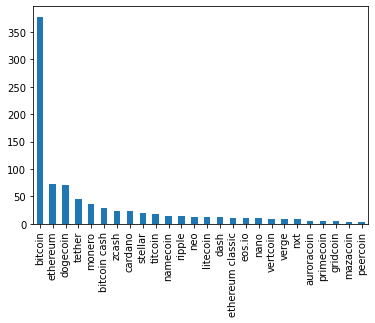

In [9]:
#############################################
## Check document count for each crypto currency

frequency = expanded_corpus['coin'].value_counts(sort=True)

frequency.head(50).plot.bar()

In [8]:
##################################################
##  Load scraped Corpus from disc

expanded_corpus = pd.read_csv("expanded_corpus.csv")

In [30]:
#############################################
##  Parse Documents into sngle sentenses


import nltk
nltk.download('punkt')


# Create a data frame to contain corpus of sentence
sentence_corpus = pd.DataFrame(columns=['coin', 'ticker','document_url','sentence'])

def clean_text(text):
    text =  re.sub('[^a-zA-Z\s\',\.]', '', text)
    text =  re.sub('\s+',' ', text)
    return(text)

# Iterate through expanded corpus, extracting sentenses and cleaning the text
for i in range(len(expanded_corpus)):
    # Parse document into sentenses
    sentence_list = nltk.tokenize.sent_tokenize(expanded_corpus.document[i])
    
    #  add sentences to sentence_corpus
    for sentence in sentence_list:
        sentence_corpus.loc[len(sentence_corpus)] = [expanded_corpus.coin[i],
                                                     expanded_corpus.ticker[i],
                                                     expanded_corpus.document_url[i],
                                                     clean_text(sentence)]


sentence_corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,coin,ticker,document_url,sentence
0,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin is a cryptocurrency invented in by an...
1,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,the currency began use in when its implementat...
2,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,"bitcoin is a decentralized digital currency, ..."
3,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,transactions are verified by network nodes thr...
4,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoins are created as a reward for a process...
...,...,...,...,...
41781,cardano,ada,https://iohk.io/en/research/,the new paradigm is decentralization where pee...
41782,cardano,ada,https://iohk.io/en/research/,the research areas that arise from this change...
41783,cardano,ada,https://iohk.io/en/research/,iohk research is headed by professor aggelos k...
41784,cardano,ada,https://iohk.io/en/research/,each team member has the freedom to propose pr...


In [31]:
#############################################
## Perform Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Create a Sentiment Intensity Analyser object
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis for extracted sentences
sentiment = sentence_corpus['sentence'].apply(lambda r: sid.polarity_scores(r))
sentiment = pd.DataFrame(list(sentiment))
# Combine sentiment scores with sentence corpus

# Check that the corpus of individuola sentences and
# Sentiment scores are the same length
print(len(sentence_corpus))
print(len(sentiment))

# Concatenate the sentement scores with the sentences being analyised
sentence_corpus =  pd.concat([sentence_corpus,sentiment], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


41786
41786


In [32]:
sentence_corpus

,coin,ticker,document_url,sentence,neg,neu,pos,compound
0,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin is a cryptocurrency invented in by an...,0.0,1.000,0.000,0.0000
1,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,the currency began use in when its implementat...,0.0,1.000,0.000,0.0000
2,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,"bitcoin is a decentralized digital currency, ...",0.0,1.000,0.000,0.0000
3,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,transactions are verified by network nodes thr...,0.0,1.000,0.000,0.0000
4,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoins are created as a reward for a process...,0.0,0.584,0.416,0.6908
...,...,...,...,...,...,...,...,...
41781,cardano,ada,https://iohk.io/en/research/,the new paradigm is decentralization where pee...,0.0,1.000,0.000,0.0000
41782,cardano,ada,https://iohk.io/en/research/,the research areas that arise from this change...,0.0,1.000,0.000,0.0000
41783,cardano,ada,https://iohk.io/en/research/,iohk research is headed by professor aggelos k...,0.0,0.753,0.247,0.8591
41784,cardano,ada,https://iohk.io/en/research/,each team member has the freedom to propose pr...,0.0,0.781,0.219,0.6369


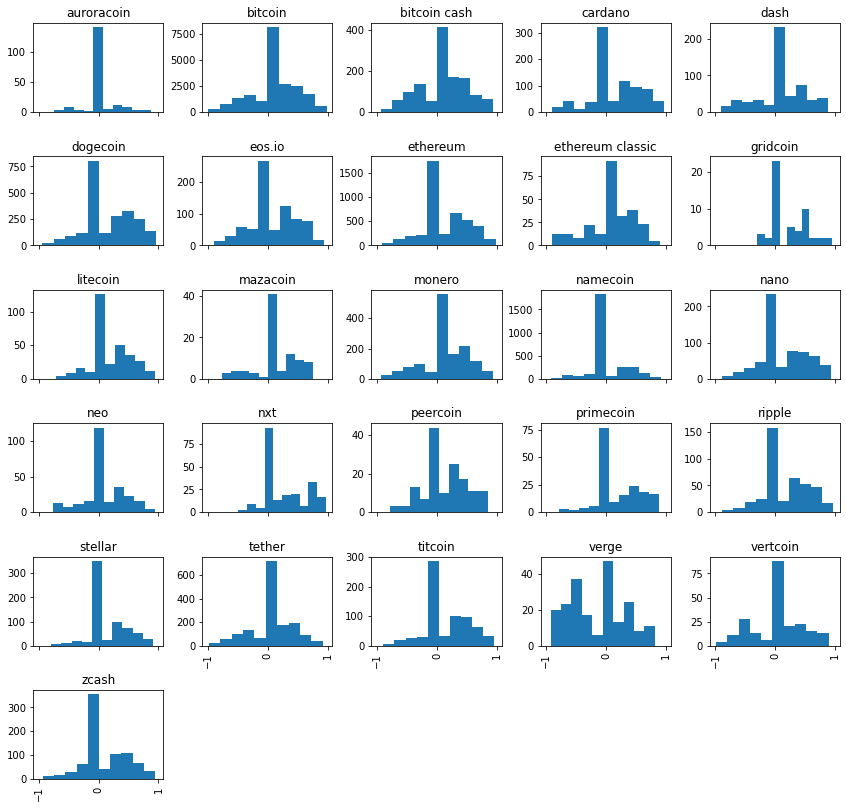

In [33]:
import matplotlib.pyplot as plt

# Display sentiment distrobution for each crypto currency analyised
sentence_corpus.compound.hist(by=sentence_corpus.coin, sharey=False, sharex=True, figsize=(14,14));

In [34]:
# Check the document count for different sentiments
# defining positive as having a score over 0.15
# negative having a score under -0.15
# and all others being neutral

negative_mentions = len(sentence_corpus[sentence_corpus['compound']<=-0.15])
positive_mentions = len(sentence_corpus[sentence_corpus['compound']>=0.15])
neutral_mentions = len(sentence_corpus[(sentence_corpus['compound']<0.15) & (sentence_corpus['compound']>-0.15)])

print("Significantly negative sentence count: " + str(negative_mentions))
print("Significantly positive sentence count: " + str(positive_mentions))
print("Neutral sentence count: " + str(neutral_mentions))

Significantly negative sentence count: 7636
Significantly positive sentence count: 16018
Neutral sentence count: 18132


In [35]:
########################################
## Create functions to:
## Clean sentences (Remove unnecessary punctuation, numbers, formatting)
## Identify named entities and replace them with a common token
## (We're interested in information about crypto currencies, not organisations that deal with them)
## POS Tag and lematize sentences

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')


# replaces named entities with "named_entity"
def remove_named_entities(text):
    parsed = nlp(text)
    output_text=[]
    ents = [e.text for e in parsed.ents]
    for item in parsed:
        if item.text in ents:
            output_text.append("named_entity")
        else:
            output_text.append(item.text)
    return " ".join(output_text)


# Return a lemmatized version of a string
def lemmatize_string(text):
    
    if text is None:
        return ""
   
    if not  isinstance(text, str):
        return ""
    
    lemmatizer = WordNetLemmatizer()

    # tokenise the sentence and determine part of speech tagging
    # for each word
    pos_tagged_text = nltk.pos_tag(nltk.word_tokenize(text))  
    
    # Convert the POS tagging from nltk.pos_tag
    # to the wordnet POS identifier recognised
    # by WordNetLemmatizer()
    words_tagged =[]
    for word in pos_tagged_text:
        if word[1].startswith('J'):
            word=(word[0], wordnet.ADJ)
        elif word[1].startswith('V'):
            word=(word[0], wordnet.VERB)
        elif word[1].startswith('N'):
            word=(word[0], wordnet.NOUN)
        elif word[1].startswith('R'):
            word=(word[0], wordnet.ADV)
        else:
            word=(word[0], None)
        words_tagged.append(word)
    
    # Lemmatize each word according to it's determined word class
    lemmatized = []
    for word, tag in words_tagged:
        if tag is None:
            lemmatized.append(word)
        else:        
            lemmatized.append(lemmatizer.lemmatize(word, tag))
    
    # reconstruct and returne lemmatized sentence
    seperator = ' '
    return seperator.join(lemmatized)

# remove everything that isn't text
# and remove 1 and 2 letter words
def scrub_text(text):
    # Remove numbers
    text =  re.sub('(?<=\s)\d+(?=\s)', '', text)
    # remove single and double character terms
    text = re.sub("(?<=\s)\w{1,2}(?=\s)", "", text)
    # remove non word characers except for spaces
    text =  re.sub('[^\w\s]',' ', text)
    # condence multple spaces
    text =  re.sub('\s+',' ', text)
    return(text)
    
print (sentence_corpus.sentence[1])
print(scrub_text(lemmatize_string(remove_named_entities(sentence_corpus.sentence[1]))))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


the currency began use in when its implementation was released as opensource software.ch.
the currency begin use when its implementation release opensource software ch 


In [37]:
########################################
## Clean sentences (Remove unnecessary punctuation, numbers, formatting)
## Identify named entities and replace them with a common token
## (We're interested in information about crypto currencies, not organisations that deal with them)
## POS Tag and lematize sentences
## Collect sentences into 3 documents for eah crypto, positive, negative and neutral


cleaned_sentence_corpus = sentence_corpus.copy(deep=True)

for i in range(len(cleaned_sentence_corpus)):
    cleaned_sentence_corpus.sentence[i] = remove_named_entities(cleaned_sentence_corpus.sentence[i])
    cleaned_sentence_corpus.sentence[i] = lemmatize_string(cleaned_sentence_corpus.sentence[i])
    cleaned_sentence_corpus.sentence[i] = scrub_text(cleaned_sentence_corpus.sentence[i])
    
cleaned_sentence_corpus

<ipython-input-37-50198f9fa8c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sentence_corpus.sentence[i] = remove_named_entities(cleaned_sentence_corpus.sentence[i])
<ipython-input-37-50198f9fa8c9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sentence_corpus.sentence[i] = lemmatize_string(cleaned_sentence_corpus.sentence[i])
<ipython-input-37-50198f9fa8c9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clea

,coin,ticker,document_url,sentence,neg,neu,pos,compound
0,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin cryptocurrency invent unknown person g...,0.0,1.000,0.000,0.0000
1,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,the currency begin use when its implementation...,0.0,1.000,0.000,0.0000
2,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin decentralized digital currency without...,0.0,1.000,0.000,0.0000
3,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,transaction verify network node through crypto...,0.0,1.000,0.000,0.0000
4,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoins create reward for process know mining,0.0,0.584,0.416,0.6908
...,...,...,...,...,...,...,...,...
41781,cardano,ada,https://iohk.io/en/research/,the new paradigm decentralization where peerto...,0.0,1.000,0.000,0.0000
41782,cardano,ada,https://iohk.io/en/research/,the research area that arise from this change ...,0.0,1.000,0.000,0.0000
41783,cardano,ada,https://iohk.io/en/research/,iohk research head professor aggelos kiayias c...,0.0,0.753,0.247,0.8591
41784,cardano,ada,https://iohk.io/en/research/,each team member have the freedom propose proj...,0.0,0.781,0.219,0.6369


In [38]:
cleaned_sentence_corpus.to_csv ('cleaned_sentence_corpus.csv', index = None, header=True)

In [40]:
#################################################
## Call coinmarketcap api, to get current data for a wide range of cryptos
##  This code was taken from coinmarketcap.com
## In their developer tools documentation

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '72a57e6d-26fa-4651-b991-ef8ab839756d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
##################################################
##  Get coin names and market cap from data

# Split the json payload returned by coinmarketcap
# on the id field to separate out the coins
api_coins = str(data).split("{'id")

# Create a new data frame to contain the current market capitalisation
# for each crypto currency
coin_market_caps = pd.DataFrame(columns=['symbol','marketcap'])

# Returns the first capture group from an re regex sreach
# and returns an empty string if None
def none_to_string(text):
    if text is not None:
        return text.group(1)
    else:
        return ""

# capture the symbol, and market cap for each coin object from the 
# initial json payload
for coin in api_coins:
    symbol = none_to_string(re.search("symbol':\s'(\w+)",coin))
    cap = none_to_string(re.search("market_cap':\s([\d\.]+)", coin))
    coin_market_caps.loc[len(coin_market_caps)] = [symbol.lower(),cap]





In [43]:
#######################################################################################################################
# Check that the coin_market_caps
# Dataframe has been populated
# There will be duplicates, and the first
# Entry will contain the correct market capitalisation

coin_market_caps

,symbol,marketcap
0,,
1,btc,941692599767.0717
2,eth,267298820428.6654
3,bnb,79982680801.90115
4,xrp,52000581348.6372
...,...,...
8291,eth,0
8292,baby,0
8293,vada,
8294,eth,0


In [ ]:
##############################
### Add the market cap figures to
### The sentence corpus for final analysis

final_sentence_corpus = cleaned_sentence_corpus.copy(deep=True)

# Add market cap column to the dataframe
final_sentence_corpus.insert(len(final_sentence_corpus.columns), "market_cap","", allow_duplicates=True)

# Each entry in the data frame, use the ticker symbol
# to find the current market cap for the currency
# mentioned in each row
for i in range(len(final_sentence_corpus)):
    if final_sentence_corpus.ticker[i] in list(coin_market_caps.symbol):
        cap = list(coin_market_caps.marketcap[coin_market_caps['symbol']==final_sentence_corpus.ticker[i]])[0]
    else:
        cap="No Data"
    final_sentence_corpus.market_cap[i]=cap
    
final_sentence_corpus

final_sentence_corpus.to_csv ('final_sentence_corpus.csv', index = None, header=True)

<ipython-input-44-b4b486cfd2ed>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentence_corpus.market_cap[i]=cap


In [529]:
####################################################################
## Vectorize corpus

final_sentence_corpus = final_sentence_corpus[final_sentence_corpus['market_cap']!="No Data"]

final_sentence_corpus["market_cap"] = pd.to_numeric(final_sentence_corpus["market_cap"])

final_sentence_corpus = final_sentence_corpus.dropna()


import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords


# Add crypto names and tickers to stopwords
stopwords = nltk.corpus.stopwords.words('english')
for i in range(len(cryptos)): 
    stopwords.append(cryptos.Currency[i])
    stopwords.append(cryptos.Symbol[i])
stopwords.append("bitcoins")
stopwords.append("named_entity")

# Additional stop words discovered after first round of analysis
stopwords = stopwords +['nakamoto', 'palmer','gox','andresen','ether','die','po',
 'dx', 'finney','mt','contract','buterin',  'cash', 'meme','eip', 'classic', 'io' ]

# Additional stopwords discovered after second round of analysis
stopwords = stopwords + ['dogecoins', 'satoshi', 'also', 'der', 'might', 'call', 'say', 'qd', 'run', 'hoskinson', 'coinbase',
'lubin', 'dao', 'dogewallet','name', 'sc', 'mu',  'ud', ]

# Use Count Vectorizer to create vector from metadata_soup field
vectorizer_neg = CountVectorizer( max_features=1000, stop_words=stopwords, binary=True)
vectorizer_neu = CountVectorizer( max_features=1000, stop_words=stopwords, binary=True)
vectorizer_pos = CountVectorizer( max_features=1000, stop_words=stopwords, binary=True)

#########################################
##  Get binary count vectors, and corosponding
##  Coin market caps and names
vec_neg = vectorizer_neg.fit_transform(final_sentence_corpus.sentence[final_sentence_corpus['compound']<-0.1].tolist())
market_cap_list_neg = final_sentence_corpus.market_cap[final_sentence_corpus['compound']<-0.1].tolist()
coin_list_neg = final_sentence_corpus.coin[final_sentence_corpus['compound']<-0.1].tolist()

vec_neu = vectorizer_neu.fit_transform(final_sentence_corpus.sentence[(final_sentence_corpus['compound']>=-0.1) & (final_sentence_corpus['compound']<=0.1)].tolist())
market_cap_list_neu = final_sentence_corpus.market_cap[(final_sentence_corpus['compound']>=-0.1) & (final_sentence_corpus['compound']<=0.1)].tolist()
coin_list_neu = final_sentence_corpus.coin[(final_sentence_corpus['compound']>=-0.1) & (final_sentence_corpus['compound']<=0.1)].tolist()

vec_pos = vectorizer_pos.fit_transform(final_sentence_corpus.sentence[final_sentence_corpus['compound']>-0.1].tolist())
market_cap_list_pos = final_sentence_corpus.market_cap[final_sentence_corpus['compound']>-0.1].tolist()
coin_list_pos = final_sentence_corpus.coin[final_sentence_corpus['compound']>-0.1].tolist()




In [530]:
#######################################
## Fit Random Forrest Regressor
## To predict market cap based on negative positive and neutral comments

import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

##########################################
## Fit random forrest regressers to predict
## Market cap based on word occurance
## In a sentiment grouped corpus

rf_neg = DecisionTreeRegressor(max_depth=10)
rf_neg.fit(vec_neg, market_cap_list_neg)

rf_pos = DecisionTreeRegressor(max_depth=10)
rf_pos.fit(vec_pos, market_cap_list_pos)

rf_neu = DecisionTreeRegressor(max_depth=10)
rf_neu.fit(vec_neu, market_cap_list_neu)

##########################################
## Fit random forrest classifiers to predict
## Crypto currency name based on word occurance
## In a sentiment grouped corpus

rf_class_neg = DecisionTreeClassifier(max_depth=10)
rf_class_neg.fit(vec_neg, coin_list_neg)

rf_class_pos = DecisionTreeClassifier(max_depth=10)
rf_class_pos.fit(vec_pos, coin_list_pos)

rf_class_neu = DecisionTreeClassifier(max_depth=10)
rf_class_neu.fit(vec_neu, coin_list_neu)

#RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                      max_depth=None, max_features='auto', max_leaf_nodes=None,
#                      max_samples=None, min_impurity_decrease=0.0,
#                      min_impurity_split=None, min_samples_leaf=1,
#                      min_samples_split=2, min_weight_fraction_leaf=0.0,
#                      n_estimators=100, n_jobs=None, oob_score=False,
#                      random_state=None, verbose=0, warm_start=False)



DecisionTreeClassifier(max_depth=10)

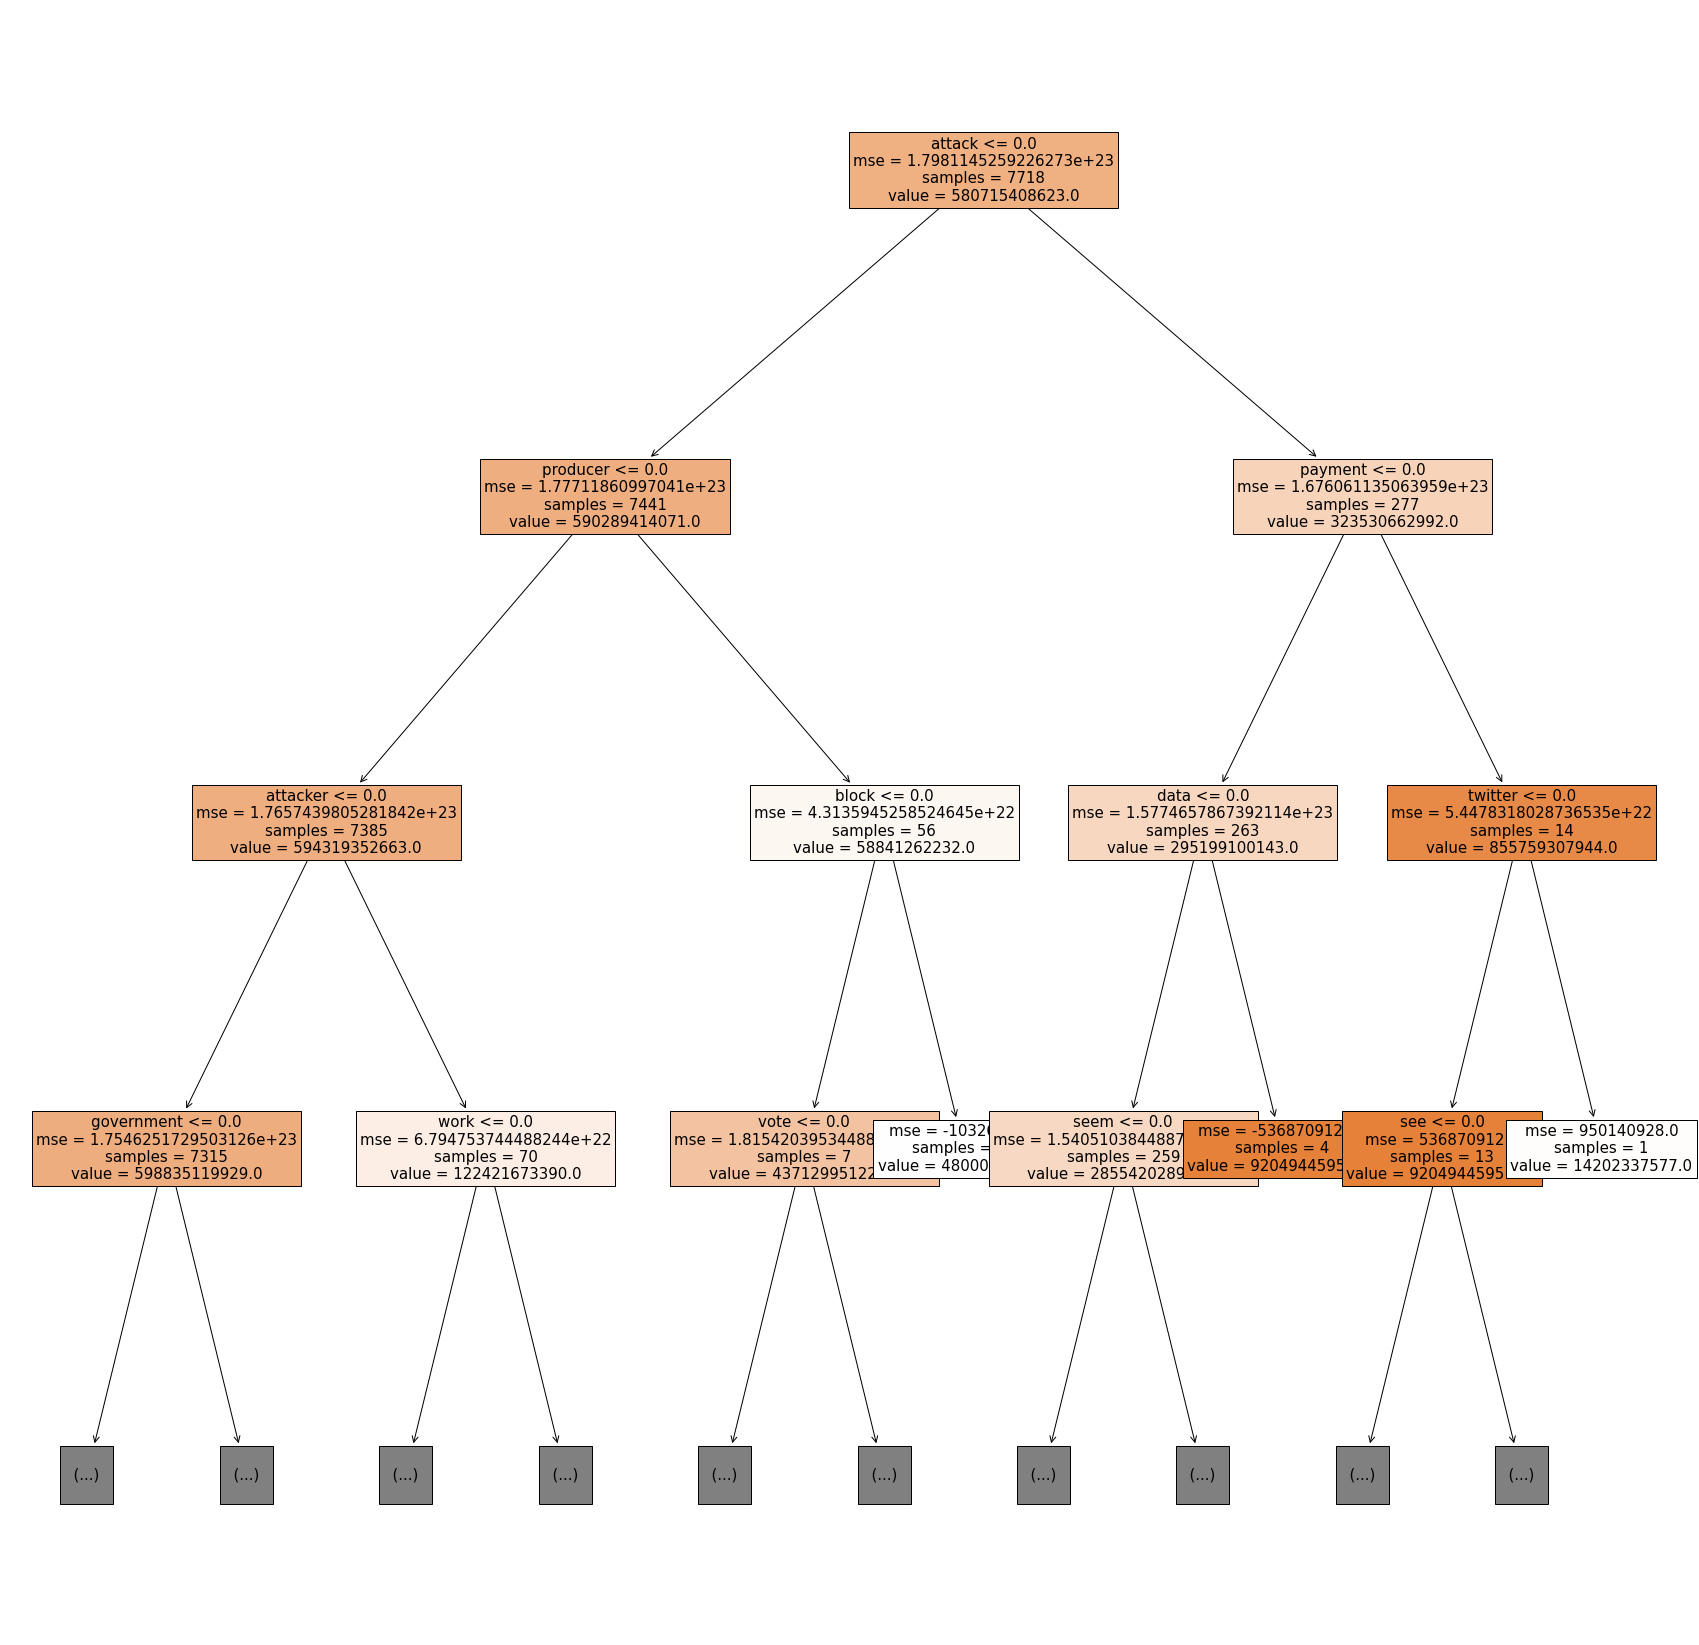

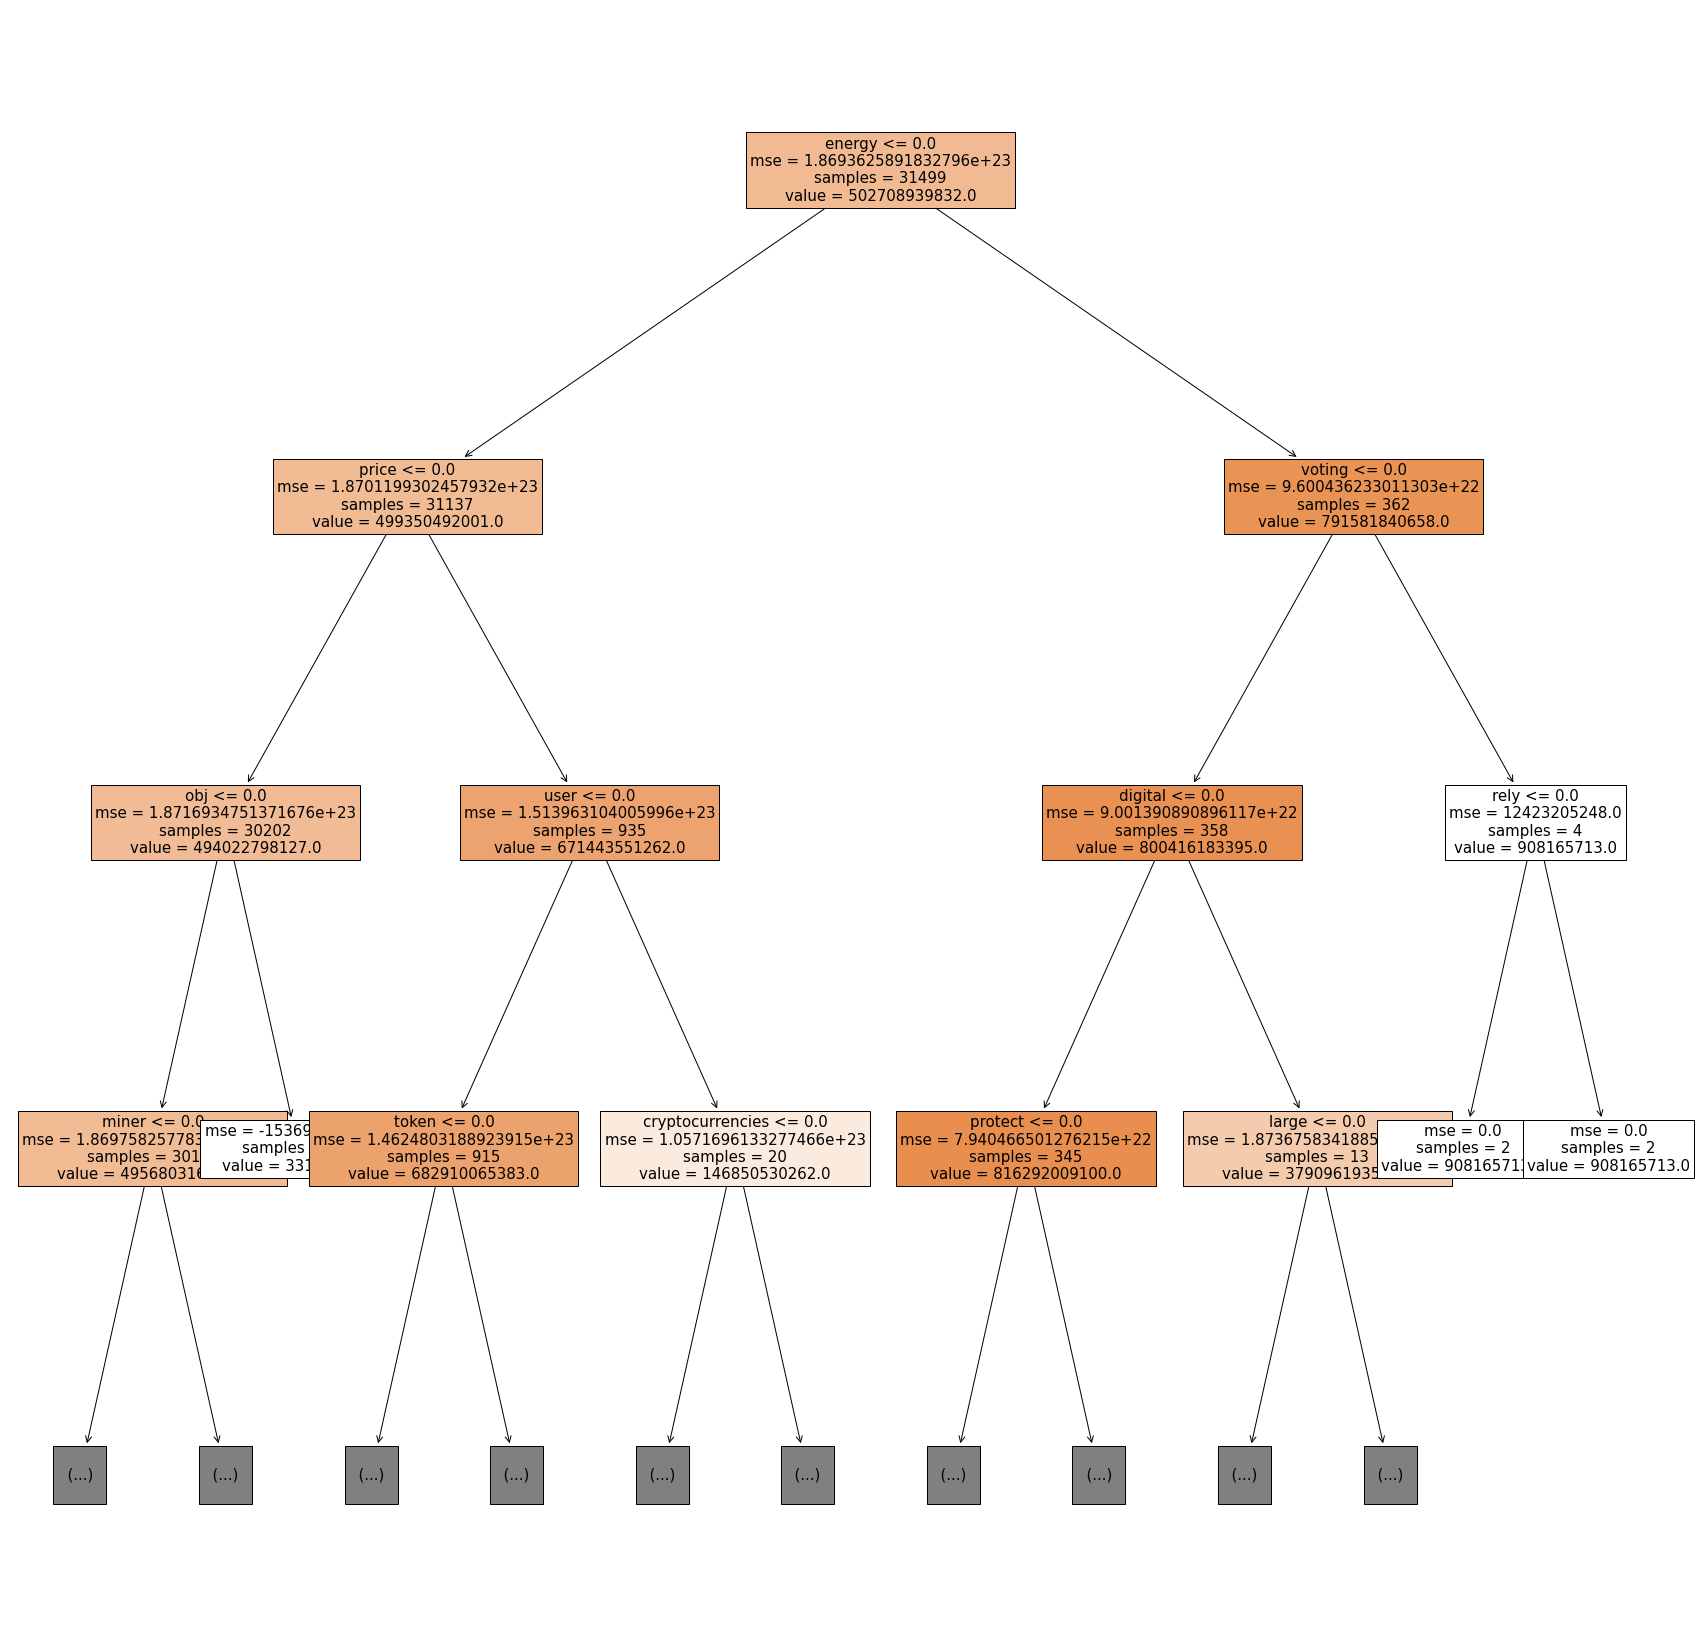

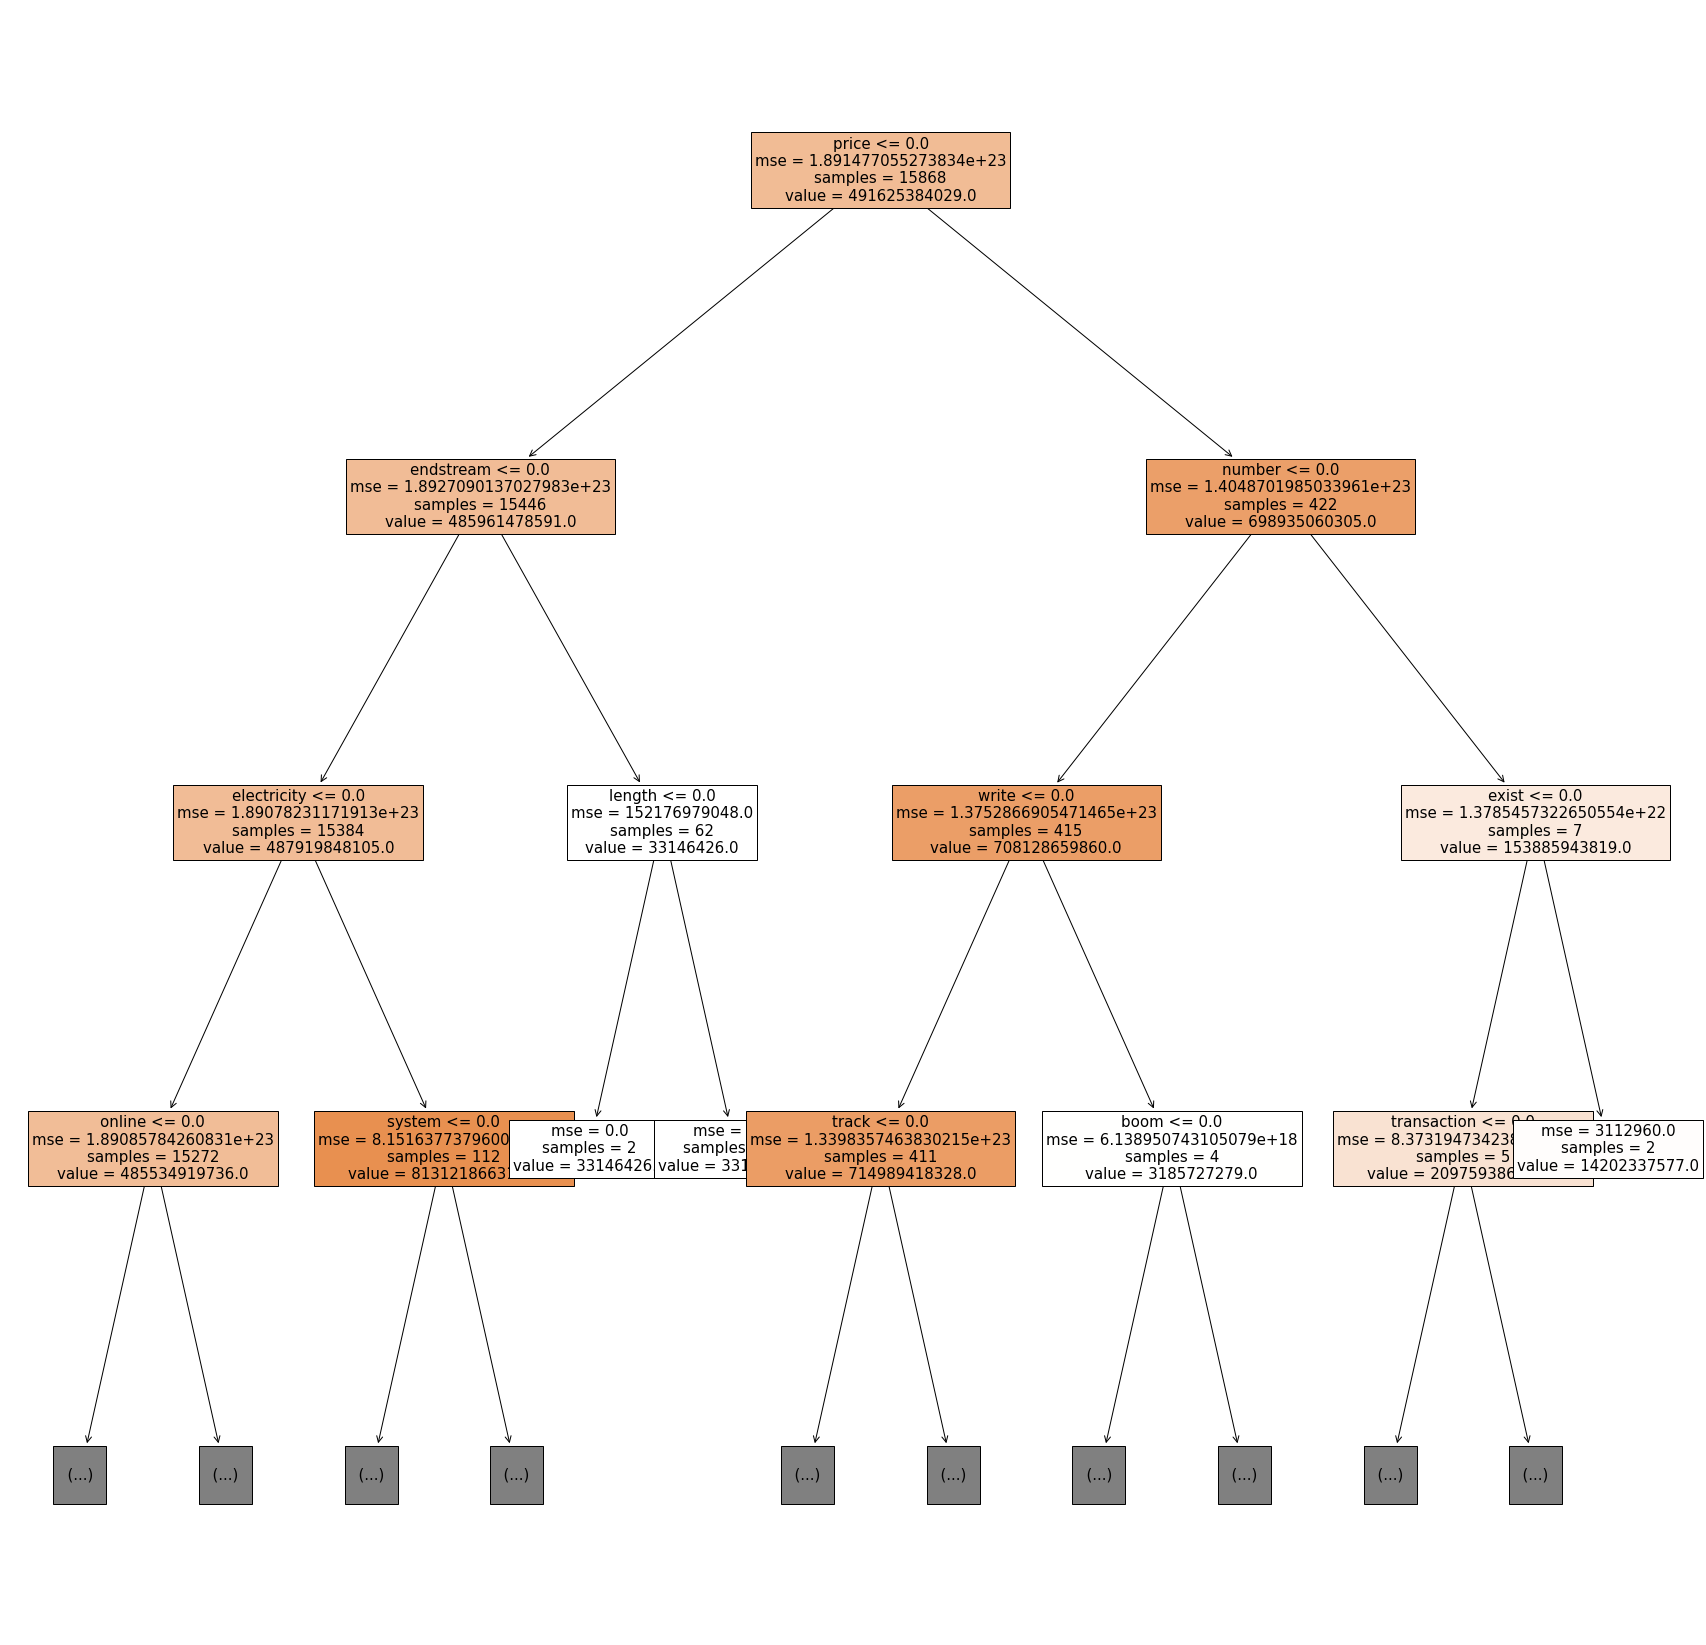

In [531]:
plt.figure(figsize=(30,30))
_ = tree.plot_tree(rf_neg, 
                   feature_names=vectorizer_neg.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0)

plt.figure(figsize=(30,30))
_ = tree.plot_tree(rf_pos, 
                   feature_names=vectorizer_pos.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0)

plt.figure(figsize=(30,30))
_ = tree.plot_tree(rf_neu, 
                   feature_names=vectorizer_neu.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0)

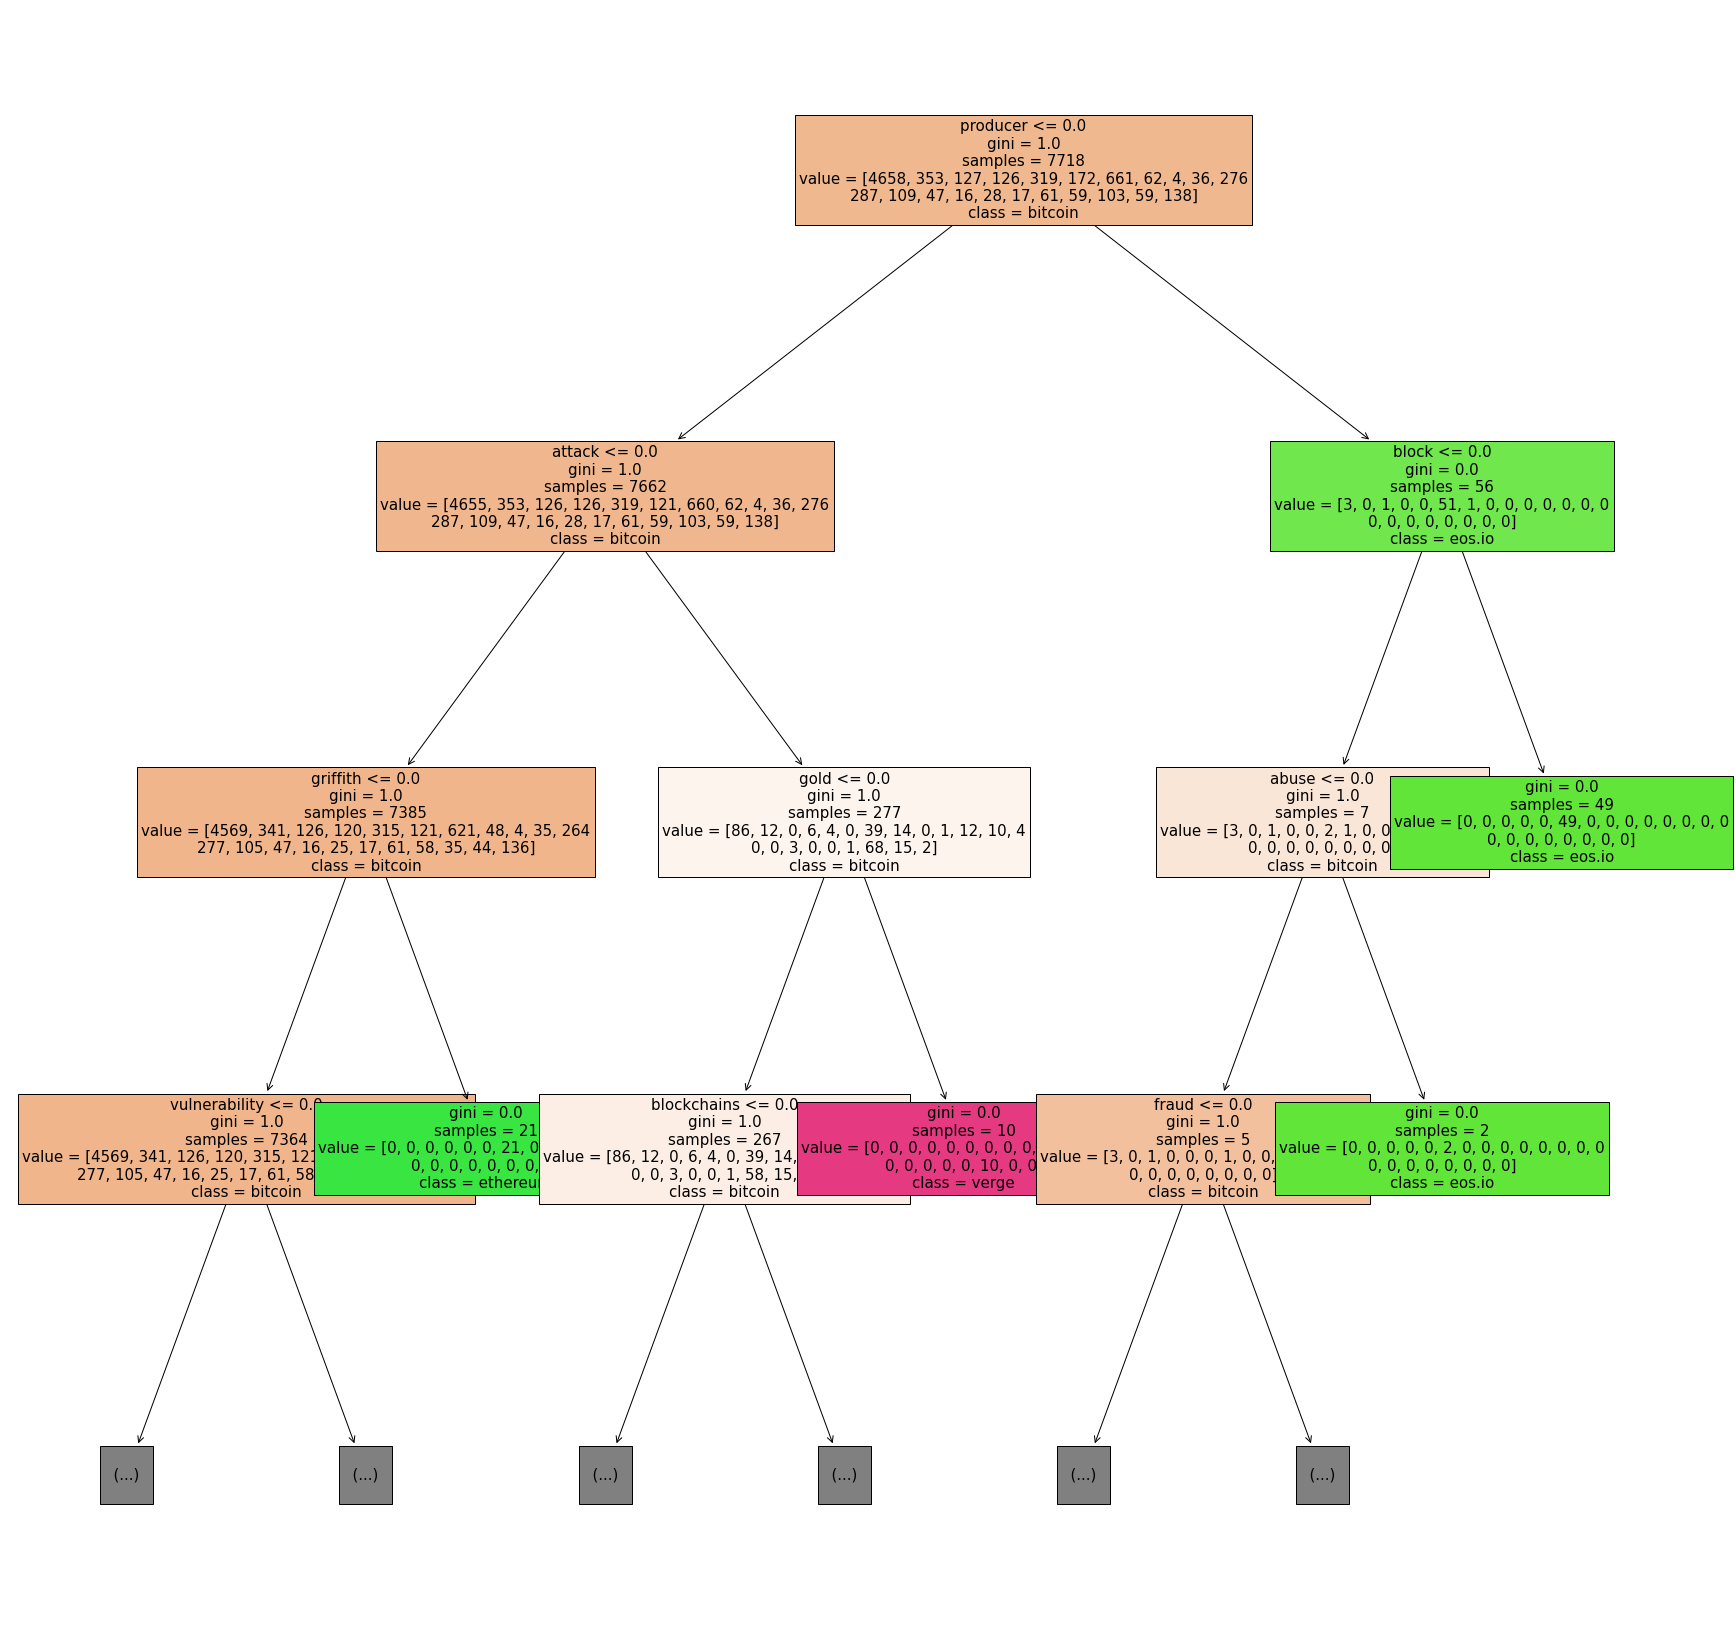

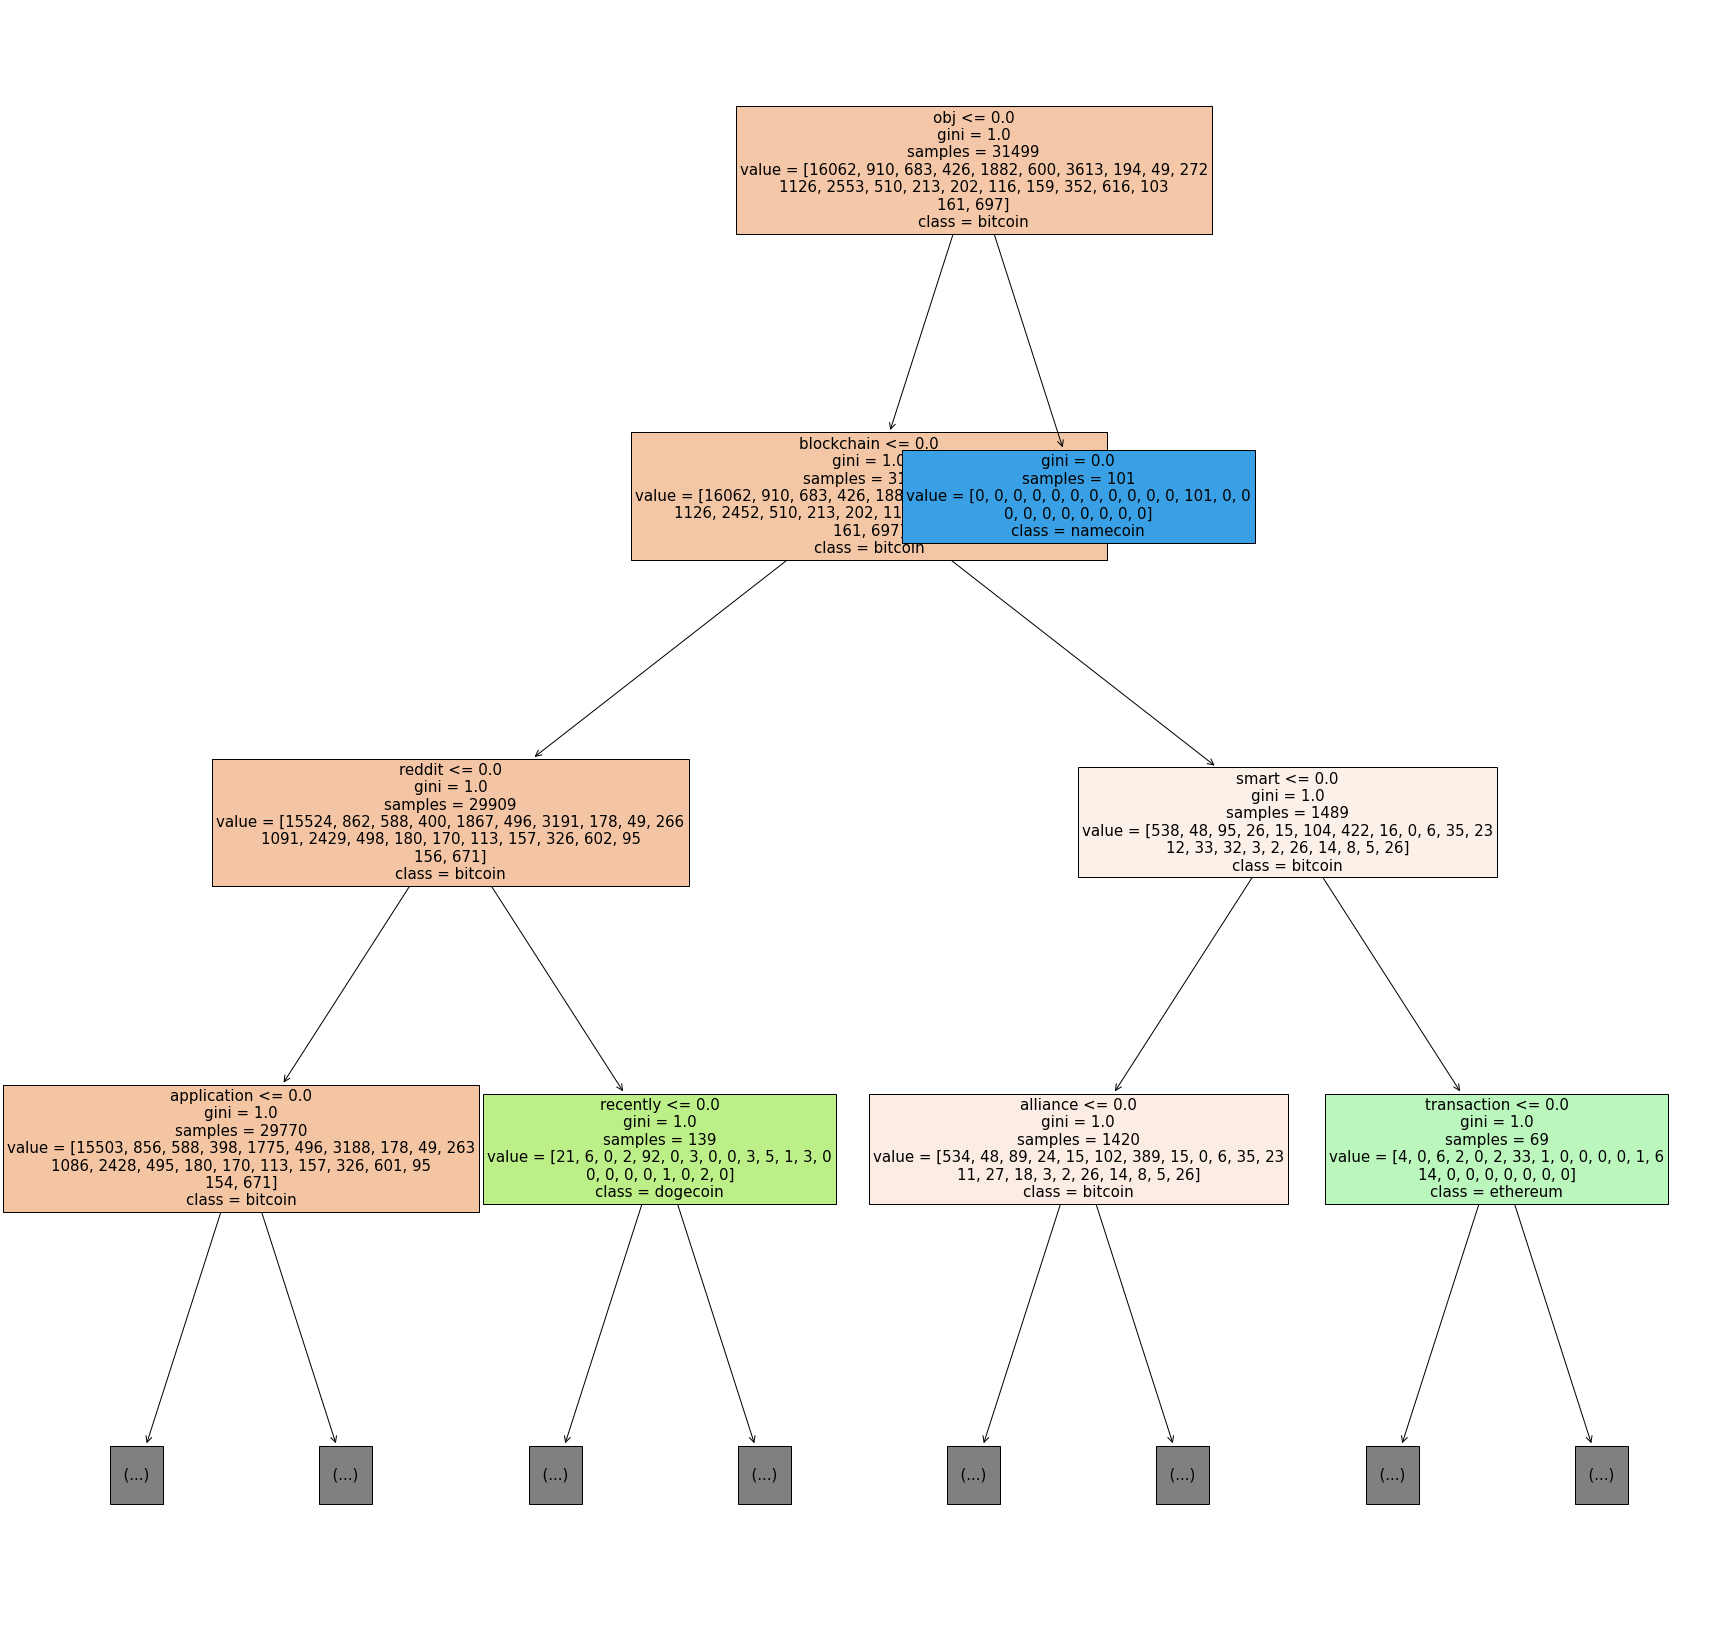

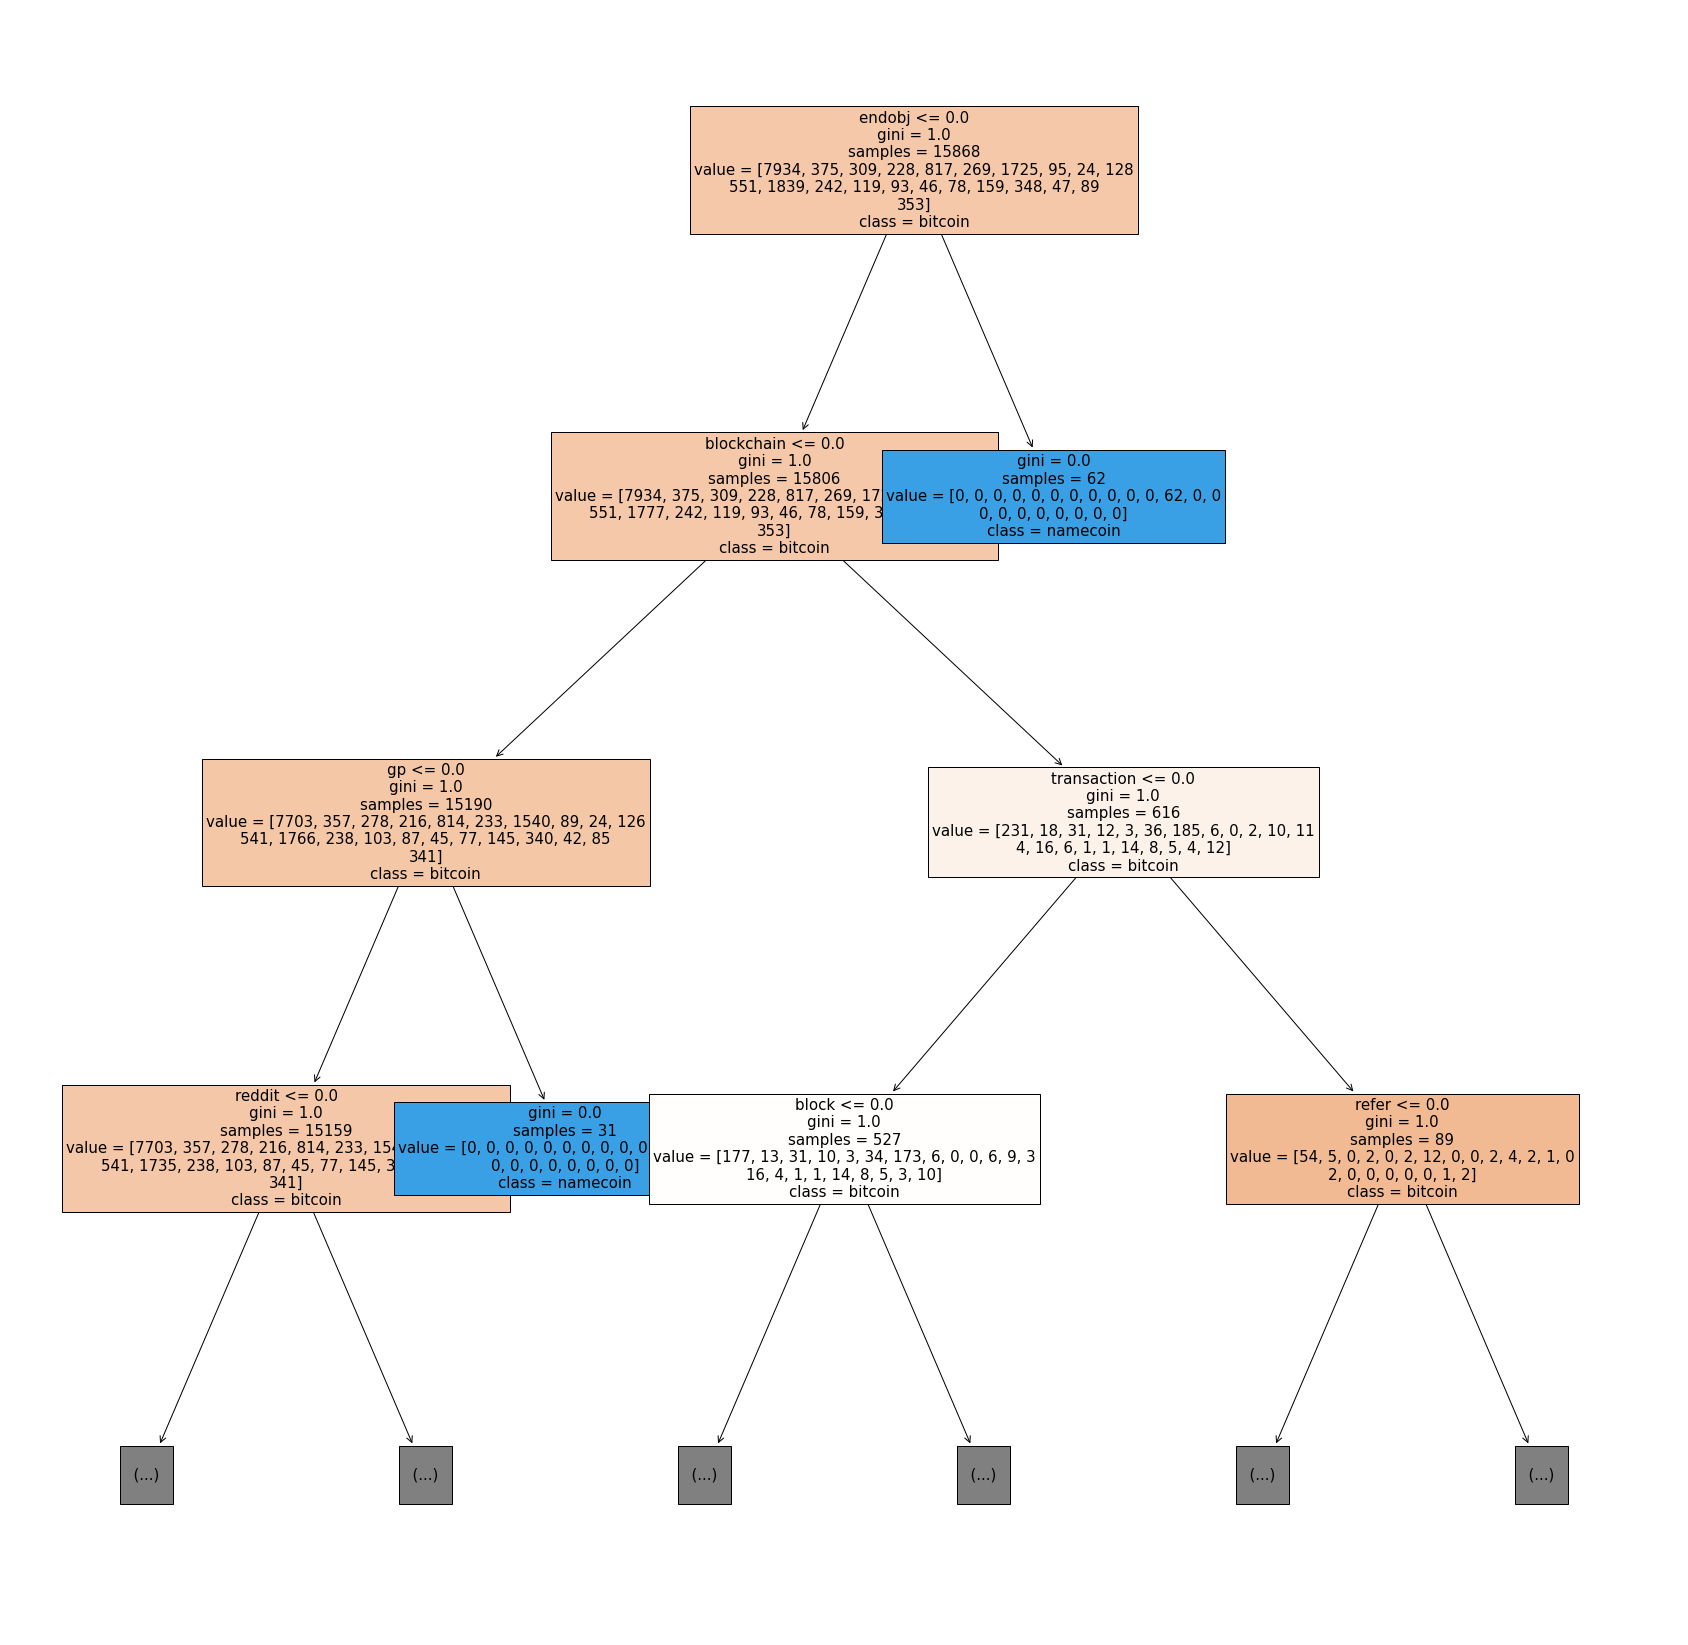

In [532]:
plt.figure(figsize=(30,30))
_ = tree.plot_tree(rf_class_neg, 
                   feature_names=vectorizer_neg.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   class_names=rf_class_neg.classes_)

plt.figure(figsize=(30,30))
_ = tree.plot_tree(rf_class_pos, 
                   feature_names=vectorizer_pos.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   class_names=rf_class_pos.classes_)

plt.figure(figsize=(30,30))
_ = tree.plot_tree(rf_class_neu, 
                   feature_names=vectorizer_neu.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   class_names=rf_class_neu.classes_)



In [533]:
importance = rf_class_neu.feature_importances_
# summarize feature importance


# accepts a random forest model and list of feature names
# and returns a dataframe coontaining featre names and importance
def get_feature_importance(rf, feature_names):
    importance = rf.feature_importances_
    feature_importance = pd.DataFrame(columns=['feature', 'importance'])
    for i in range(len(importance)):
        feature_importance.loc[len(feature_importance)] = [feature_names[i], importance[i]]
    return feature_importance

#################################
## Get feature importance for each model
regressor_pos_feature_importance = get_feature_importance(rf_pos, vectorizer_pos.get_feature_names())
regressor_neg_feature_importance = get_feature_importance(rf_neg, vectorizer_neg.get_feature_names())
regressor_neu_feature_importance = get_feature_importance(rf_neu, vectorizer_neu.get_feature_names())

classifier_pos_feature_importance = get_feature_importance(rf_class_pos, vectorizer_pos.get_feature_names())
classifier_neg_feature_importance = get_feature_importance(rf_class_neg, vectorizer_neg.get_feature_names())
classifier_neu_feature_importance = get_feature_importance(rf_class_neu, vectorizer_neu.get_feature_names())

print("Random Forest Regressor for Featres from Positive Comments")
print("Featre Importance:")
print(regressor_pos_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Regressor for Featres from Negative Comments")
print("Featre Importance:")
print(regressor_neg_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Regressor for Featres from Neutral Comments")
print("Featre Importance:")
print(regressor_neu_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Classifier for Featres from Positive Comments")
print("Featre Importance:")
print(classifier_pos_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Classifier for Featres from Negative Comments")
print("Featre Importance:")
print(classifier_neg_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Classifier for Featres from Neutral Comments")
print("Featre Importance:")
print(classifier_neu_feature_importance.sort_values(by=['importance'], ascending=False).head(15))

Random Forest Regressor for Featres from Positive Comments
Featre Importance:
         feature  importance
296       energy    0.091562
682        price    0.085536
601          obj    0.074094
563        miner    0.072500
909        token    0.070805
400   government    0.066156
286  electricity    0.060191
827        smart    0.053983
347      feature    0.048919
397         gold    0.044242
154         coin    0.030233
723        raise    0.021246
949         user    0.020913
251      digital    0.015244
991         work    0.011143
######################

Random Forest Regressor for Featres from Negative Comments
Featre Importance:
           feature  importance
61          attack    0.111764
688       producer    0.093724
62        attacker    0.092553
396     government    0.074127
78            bank    0.055078
346            fee    0.054268
366           fork    0.053523
435        illegal    0.047877
962  vulnerability    0.043644
999             zu    0.037589
642        paym

In [ ]:
['dogecoins', 'satoshi', 'also', 'der', 'might', 'call', 'say', 'qd', 'run', 'hoskinson', 'coinbase',
'lubin', 'dao', 'dogewallet','name', 'sc', 'mu',  'ud', ]